In [9]:
import pandas as pd
import numpy as np

In [11]:
dataset = pd.read_csv('Phishing_Legitimate_full.csv')

In [13]:
dataset

id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0         1        3               1          5         72        0   
1         2        3               1          3        144        0   
2         3        3               1          2         58        0   
3         4        3               1          6         79        1   
4         5        3               0          4         46        0   
...     ...      ...             ...        ...        ...      ...   
9995   9996        3               1          1         50        0   
9996   9997        2               1          4         59        1   
9997   9998        2               1          4         57        0   
9998   9999        3               1          1         49        0   
9999  10000        3               1          2         52        3   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                     0         0            0              0  ...   
1                     0         0            0              2  ...   
2                     0         0            0              0  ...   
3                     0         0            0              0  ...   
4                     0         0            0              0  ...   
...                 ...       ...          ...            ...  ...   
9995                  0         0            0              0  ...   
9996                  0         0            0              0  ...   
9997                  0         0            0              0  ...   
9998                  0         0            0              0  ...   
9999                  0         0            0              0  ...   

      IframeOrFrame  MissingTitle  ImagesOnlyInForm  SubdomainLevelRT  \
0                 0             0                 1                 1   
1                 0             0                 0                 1   
2                 0             0                 0                 1   
3                 0             0                 0                 1   
4                 1             0                 0                 1   
...             ...           ...               ...               ...   
9995              0             0                 0                 1   
9996              1             0                 0                 1   
9997              0             0                 0                 1   
9998              1             0                 0                 1   
9999              0             0                 0                 1   

      UrlLengthRT  PctExtResourceUrlsRT  AbnormalExtFormActionR  \
0               0                     1                       1   
1              -1                     1                       1   
2               0                    -1                       1   
3              -1                     1                       1   
4               1                    -1                       0   
...           ...                   ...                     ...   
9995            1                    -1                       1   
9996            0                     0                       1   
9997            0                     1                       1   
9998            1                     0                       1   
9999            1                     1                       1   

      ExtMetaScriptLinkRT  PctExtNullSelfRedirectHyperlinksRT  CLASS_LABEL  
0                      -1                                   1            1  
1                       1                                   1            1  
2                      -1                                   0            1  
3                       1                                  -1            1  
4                      -1                                  -1            1  
...                   ...                                 ...          ...  
9995                    0                                   1            0  
9996             

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [52]:
#split dataset
X = dataset.iloc[:, 2:49]
y = dataset.iloc[:, 49]
X_train, y_train, X_test, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [54]:
array = np.array([0.0, 0.0, 1.0, ..., 1.0, 0.0, 1.0])  # Your 1D array
reshaped_array = array.reshape(-1, 1)
print(reshaped_array.shape)

(7, 1)


In [56]:
import math
math.sqrt(len(y_train))

44.721359549995796

In [58]:
#define model
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

In [60]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

8000 2000
8000 2000


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [66]:
# Example preprocessing step
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

print(len(X_train_scaled), len(y_train))  # Should be equal
print(len(X_test_scaled), len(y_test))  # Should be equal

7500 7500
2500 2500


In [68]:
#fit model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [80]:
array = np.array([[1, 2, 3], [4, 5, 6]])

In [84]:
print(array.flags['C_CONTIGUOUS'])

True


In [86]:
import numpy as np

# Create a sample array
array = np.array([[1, 2, 3], [4, 5, 6]])

# Incorrect usage that causes the error
try:
    print(array.flags.c_contiguous)
except AttributeError as e:
    print(e)

# Correct usage
print("Is the array C-contiguous?", array.flags['C_CONTIGUOUS'])

# Further checks
print("Is the array F-contiguous (Fortran order)?", array.flags['F_CONTIGUOUS'])
print("Is the array OWNDATA?", array.flags['OWNDATA'])


True
Is the array C-contiguous? True
Is the array F-contiguous (Fortran order)? False
Is the array OWNDATA? True


In [90]:
import numpy as np

# Example function that requires a contiguous array
def some_function(arr):
    if not arr.flags['C_CONTIGUOUS']:
        raise ValueError("Array must be C-contiguous")
    # Process the array
    return np.sum(arr, axis=0)

# Create an array and ensure it is contiguous
array = np.array([[1, 2, 3], [4, 5, 6]])
contiguous_array = np.ascontiguousarray(array)

# Correctly access flags and process the array
if contiguous_array.flags['C_CONTIGUOUS']:
    result = some_function(contiguous_array)
    print("Result:", result)
else:
    print("Array is not C-contiguous")


Result: [5 7 9]


In [96]:
# Check if the array is C-contiguous
array = np.array([[1, 2, 3], [4, 5, 6]])
print(array.flags['C_CONTIGUOUS']) 

True


In [99]:
import numpy as np

# Create a 2D array
array = np.array([[1, 2, 3], [4, 5, 6]])

# Ensure the array is C-contiguous
contiguous_array = np.ascontiguousarray(array)

# Check if the array is C-contiguous
print(contiguous_array.flags['C_CONTIGUOUS'])  # Output: True


True


In [101]:
import numpy as np

# Function that requires a C-contiguous array
def process_array(arr):
    if not arr.flags['C_CONTIGUOUS']:
        arr = np.ascontiguousarray(arr)
    # Process the array
    return np.sum(arr, axis=1)

# Example data
data = np.array([[1, 2, 3], [4, 5, 6]])

# Ensure data is C-contiguous and process it
result = process_array(data)
print("Result:", result)


Result: [ 6 15]


In [107]:
print(f"{dataset.dtypes}\n")
print(f"Dimension: {dataset.shape[0]} x {dataset.shape[1]}\n")
datatype_counts = dataset.dtypes.value_counts()
for dtype, count in datatype_counts.items():
    print(f"{dtype}: {count} columns")

id                                      int64
NumDots                                 int64
SubdomainLevel                          int64
PathLevel                               int64
UrlLength                               int64
NumDash                                 int64
NumDashInHostname                       int64
AtSymbol                                int64
TildeSymbol                             int64
NumUnderscore                           int64
NumPercent                              int64
NumQueryComponents                      int64
NumAmpersand                            int64
NumHash                                 int64
NumNumericChars                         int64
NoHttps                                 int64
RandomString                            int64
IpAddress                               int64
DomainInSubdomains                      int64
DomainInPaths                           int64
HttpsInHostname                         int64
HostnameLength                    

In [109]:
dataset = dataset.drop("id", axis=1)

In [117]:
null = dataset.isnull() .sum()
for i in range(len(dataset.columns)):
    print(f"{dataset.columns[i]}: {null[i]} ({(null[i]/len(dataset))*100}%)")
total_cells = np.prod(dataset.shape)
total_missing = null.sum()
print(f"\nTotal missing values: {total_missing} ({(total_missing/total_cells) *100}%)")

    
    


NumDots: 0 (0.0%)
SubdomainLevel: 0 (0.0%)
PathLevel: 0 (0.0%)
UrlLength: 0 (0.0%)
NumDash: 0 (0.0%)
NumDashInHostname: 0 (0.0%)
AtSymbol: 0 (0.0%)
TildeSymbol: 0 (0.0%)
NumUnderscore: 0 (0.0%)
NumPercent: 0 (0.0%)
NumQueryComponents: 0 (0.0%)
NumAmpersand: 0 (0.0%)
NumHash: 0 (0.0%)
NumNumericChars: 0 (0.0%)
NoHttps: 0 (0.0%)
RandomString: 0 (0.0%)
IpAddress: 0 (0.0%)
DomainInSubdomains: 0 (0.0%)
DomainInPaths: 0 (0.0%)
HttpsInHostname: 0 (0.0%)
HostnameLength: 0 (0.0%)
PathLength: 0 (0.0%)
QueryLength: 0 (0.0%)
DoubleSlashInPath: 0 (0.0%)
NumSensitiveWords: 0 (0.0%)
EmbeddedBrandName: 0 (0.0%)
PctExtHyperlinks: 0 (0.0%)
PctExtResourceUrls: 0 (0.0%)
ExtFavicon: 0 (0.0%)
InsecureForms: 0 (0.0%)
RelativeFormAction: 0 (0.0%)
ExtFormAction: 0 (0.0%)
AbnormalFormAction: 0 (0.0%)
PctNullSelfRedirectHyperlinks: 0 (0.0%)
FrequentDomainNameMismatch: 0 (0.0%)
FakeLinkInStatusBar: 0 (0.0%)
RightClickDisabled: 0 (0.0%)
PopUpWindow: 0 (0.0%)
SubmitInfoToEmail: 0 (0.0%)
IframeOrFrame: 0 (0.0%)
Miss

In [19]:
def is_continuous(series):
    return series.nunique() > 10

continuous_columns = [col for col in dataset.columns if is_continuous(dataset[col])]

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


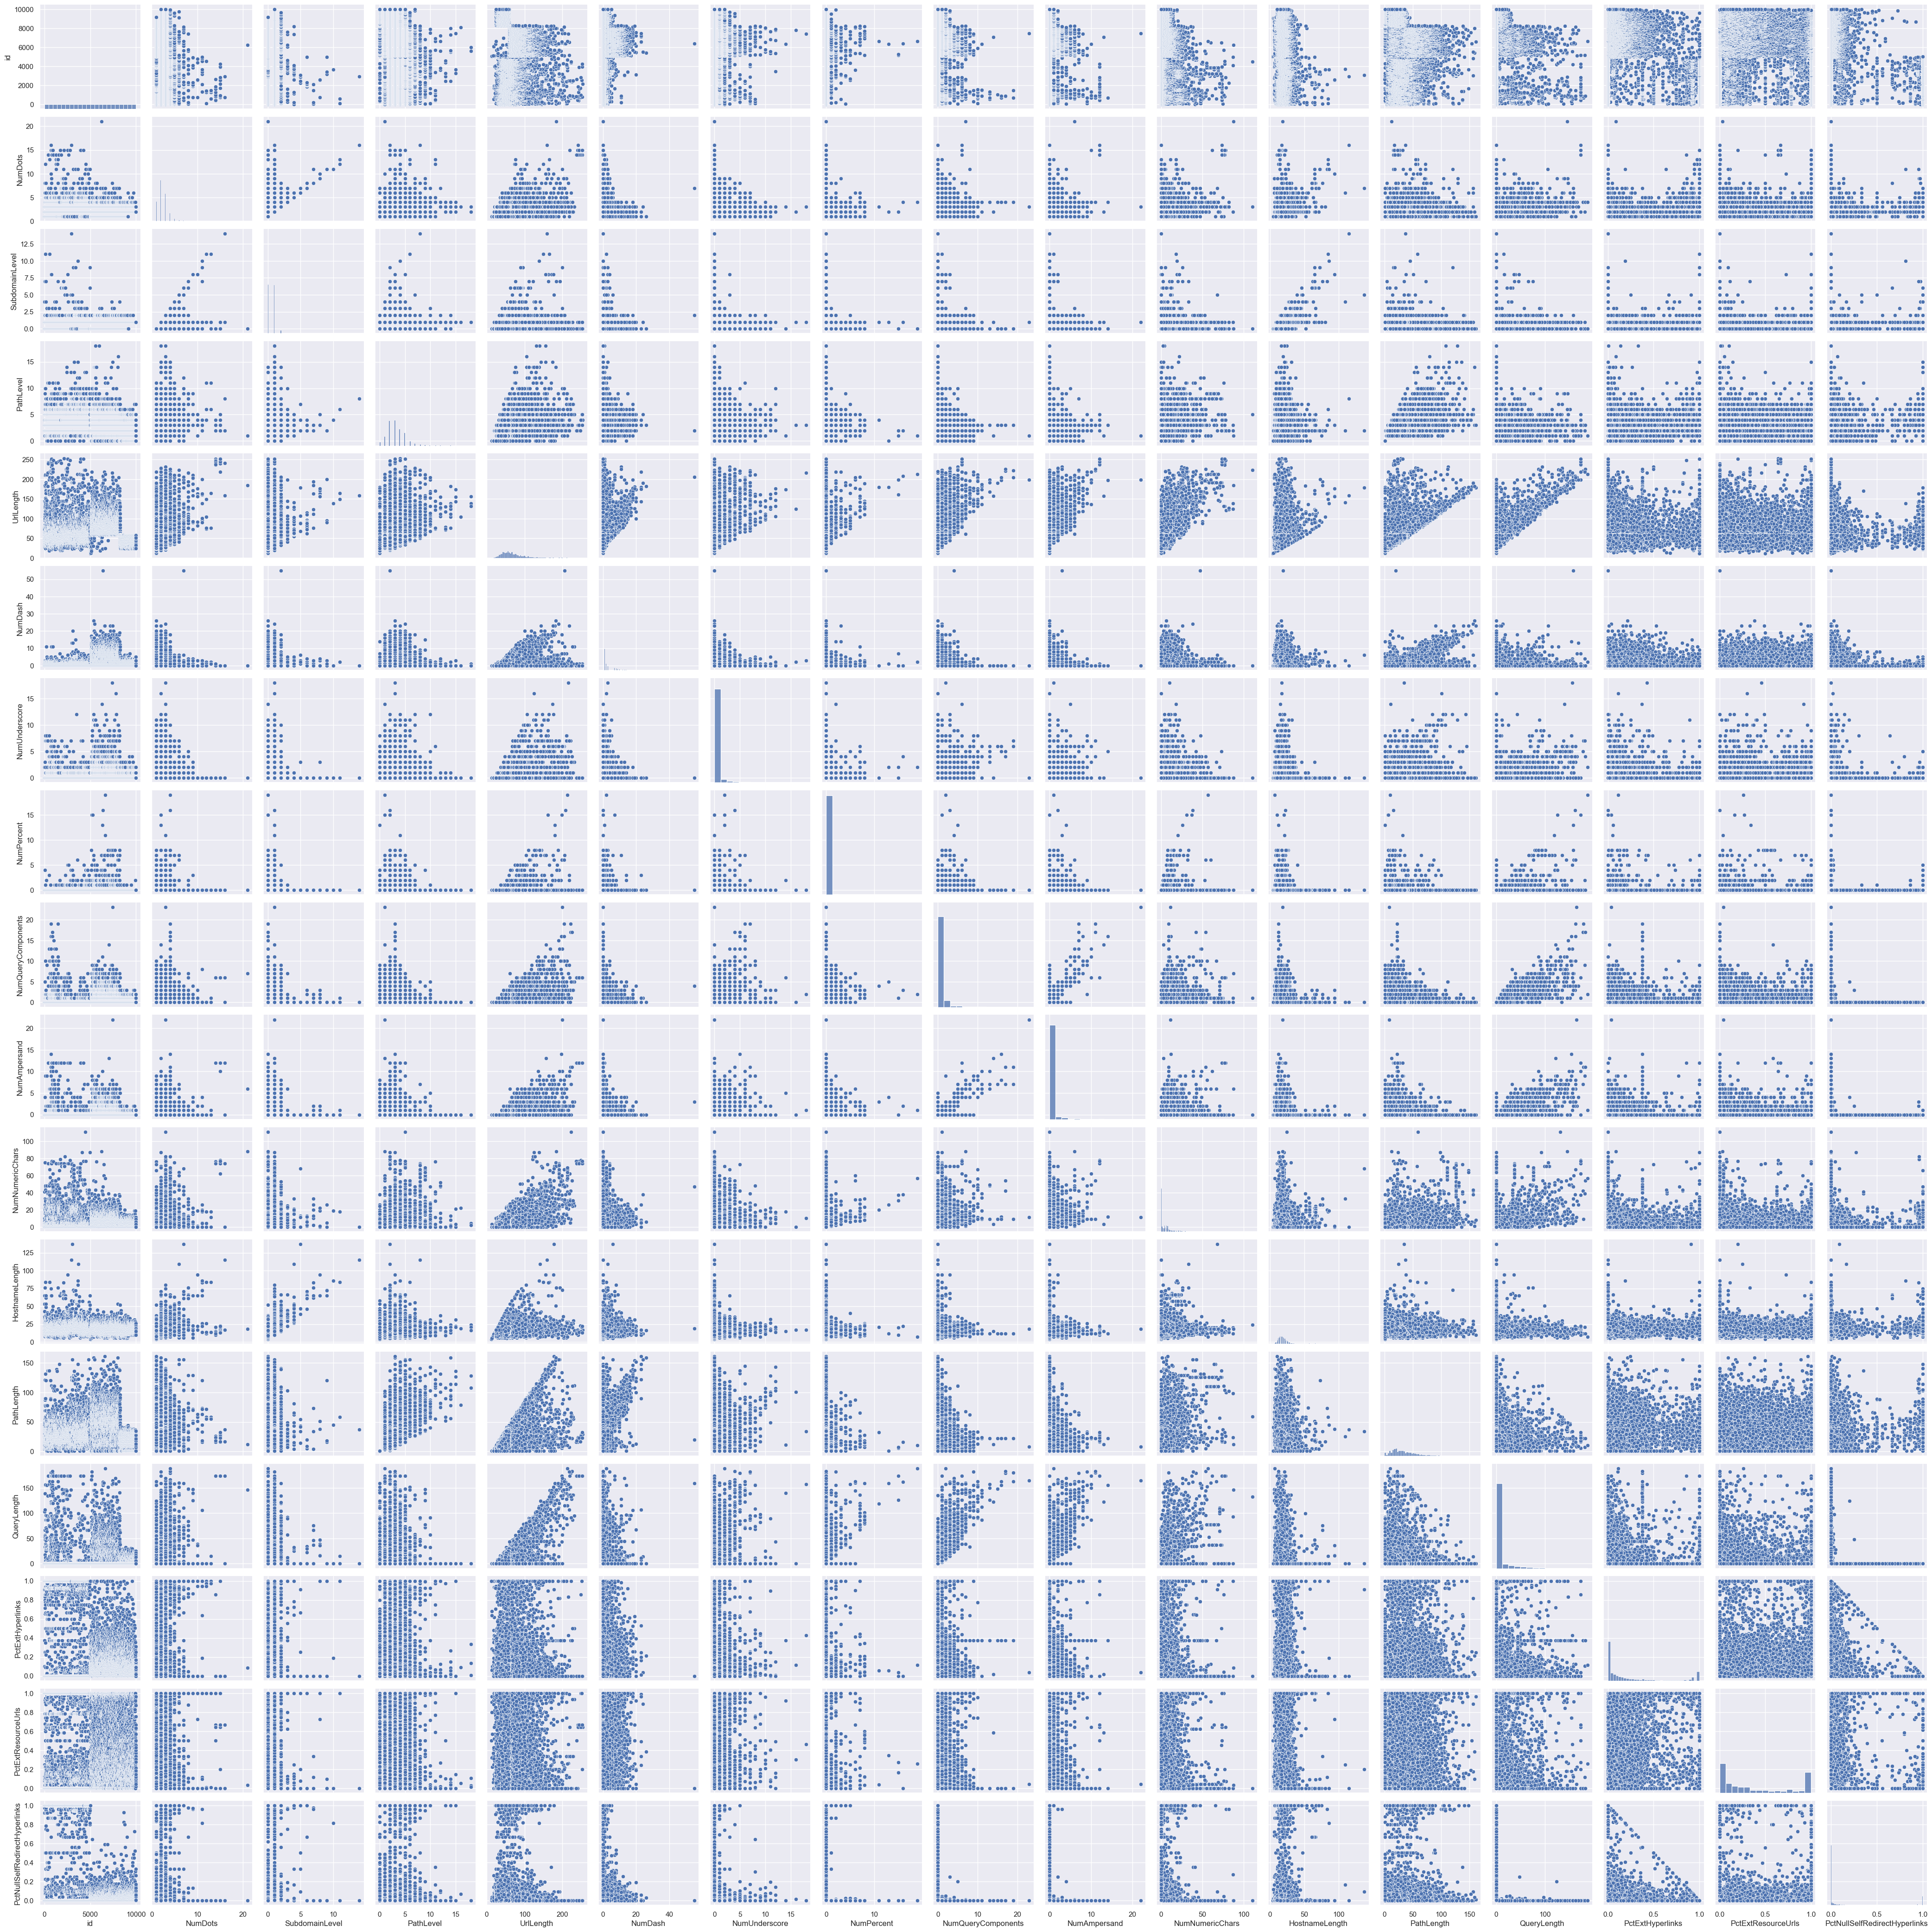

In [23]:
sns.pairplot(dataset[continuous_columns], height=2.5)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\HP\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


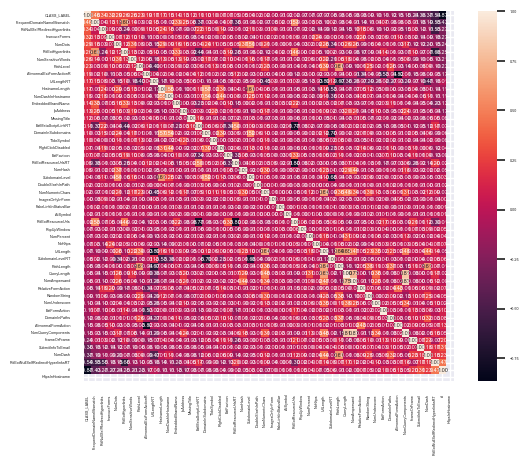

In [24]:
# correlation of the data
corr = dataset.corr()
cols = corr.nlargest(50, 'CLASS_LABEL')['CLASS_LABEL'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set_theme(font_scale=0.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 4}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [27]:
ordinal_columns = [col for col in dataset.columns if col not in continuous_columns]

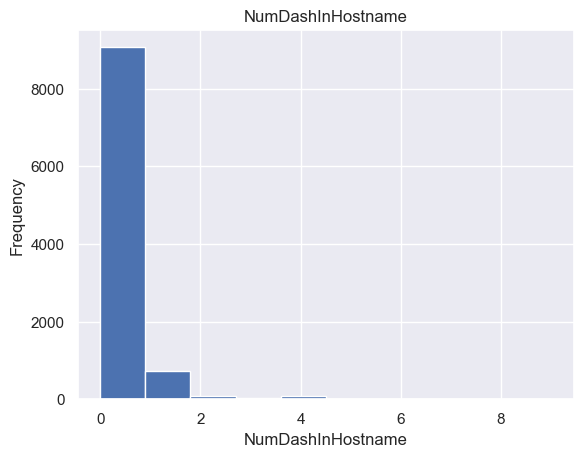

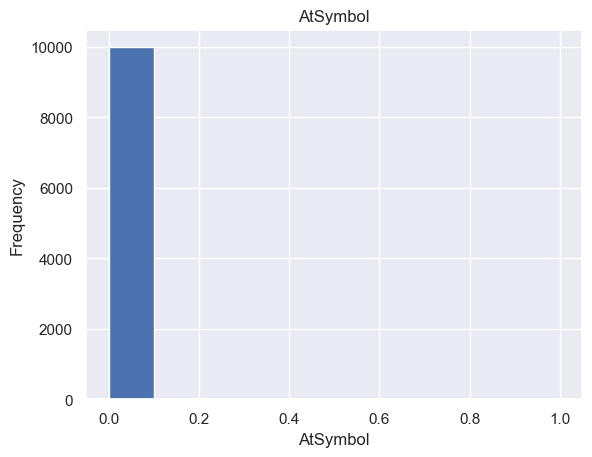

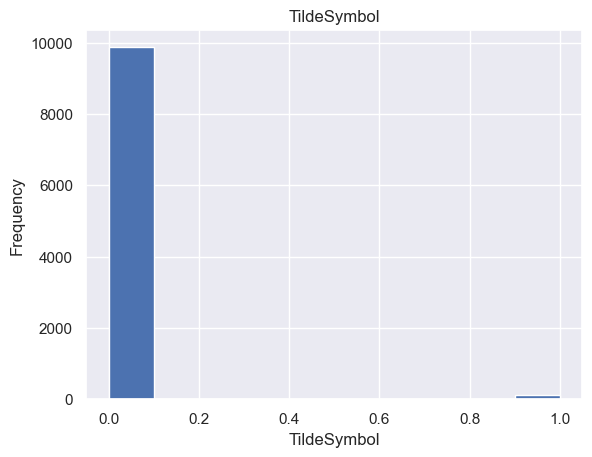

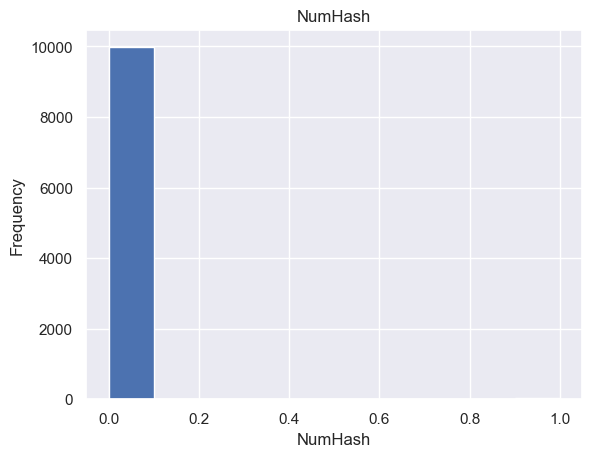

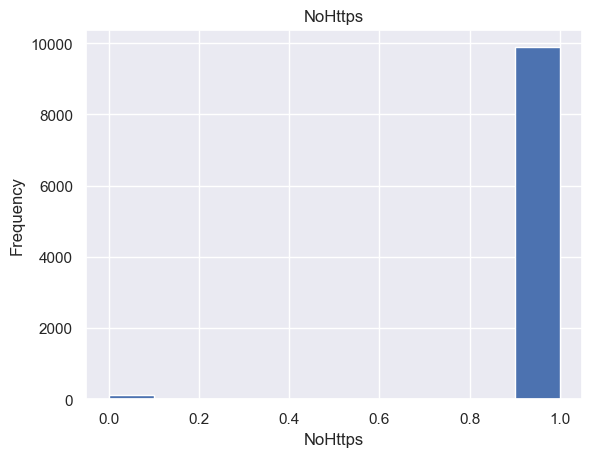

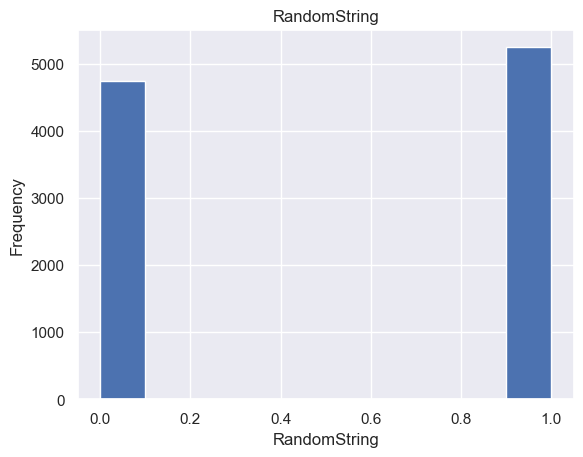

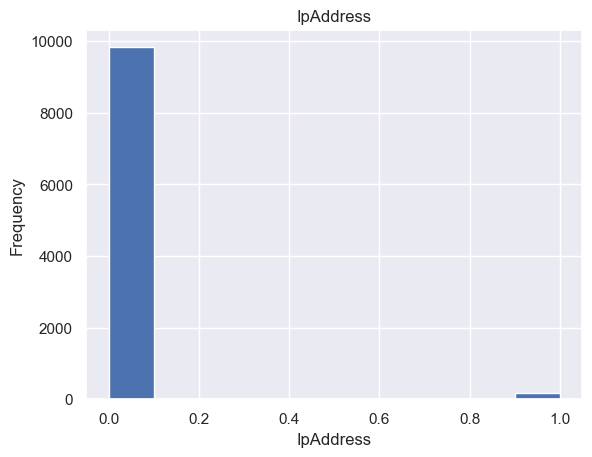

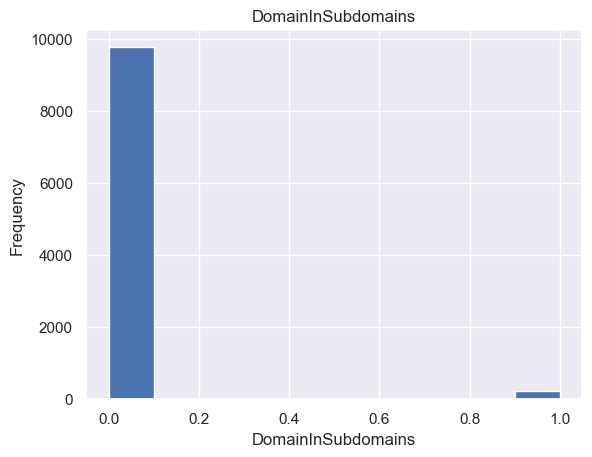

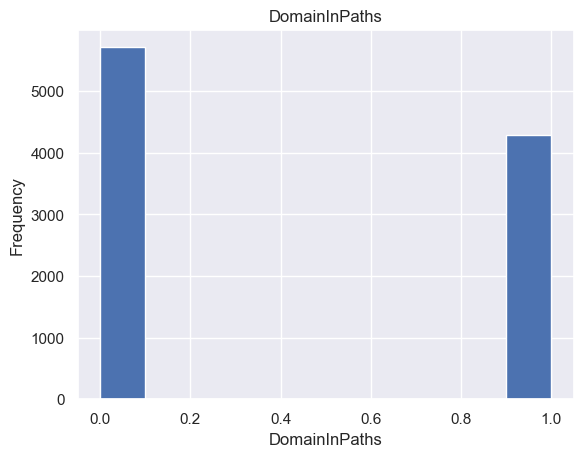

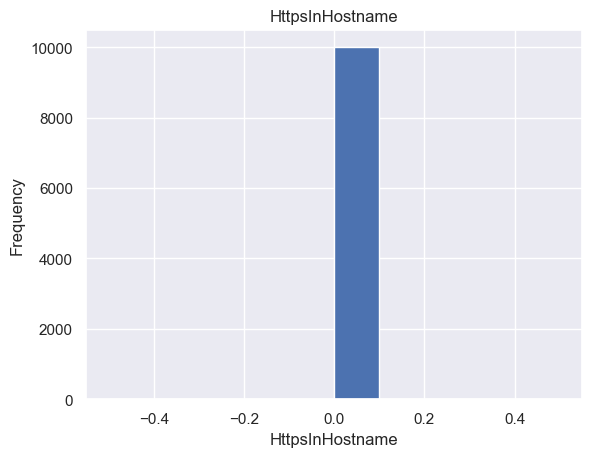

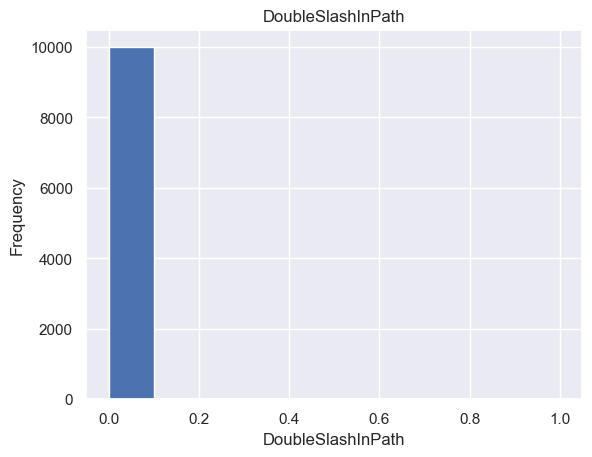

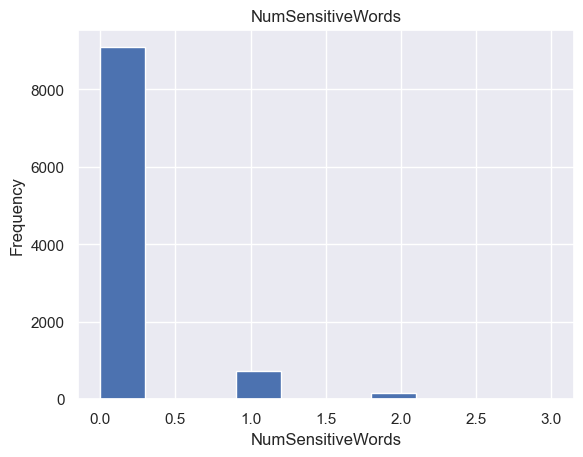

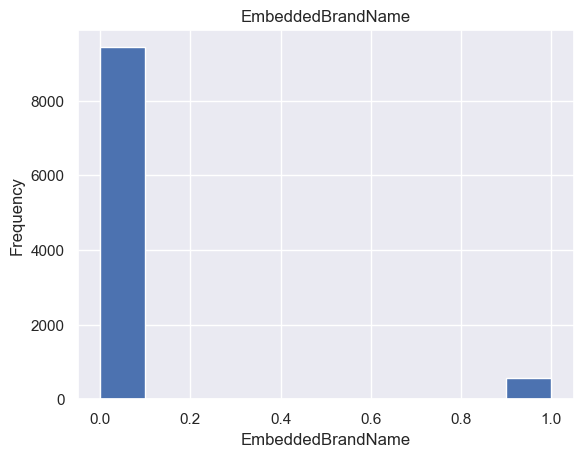

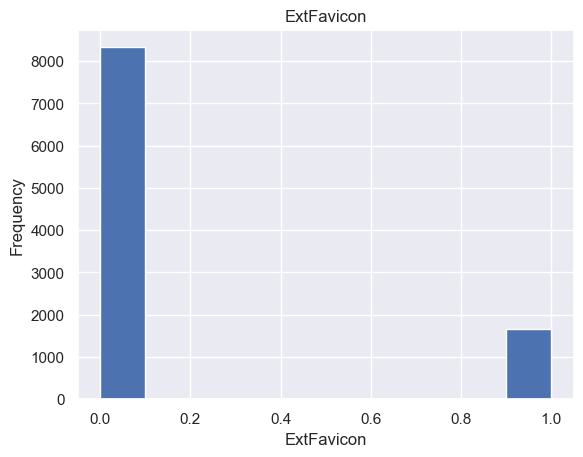

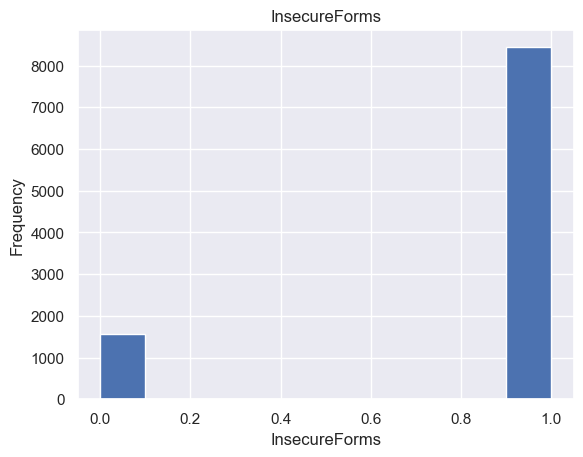

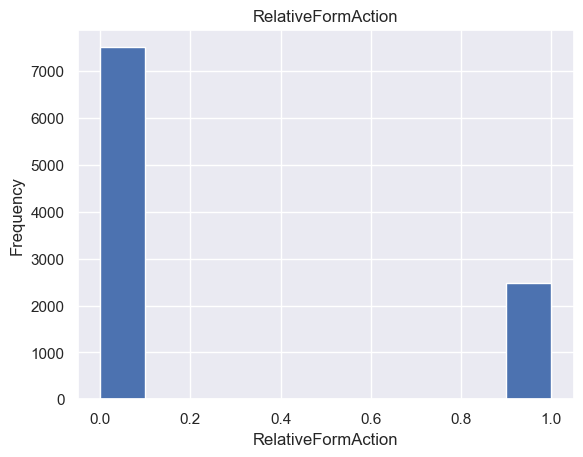

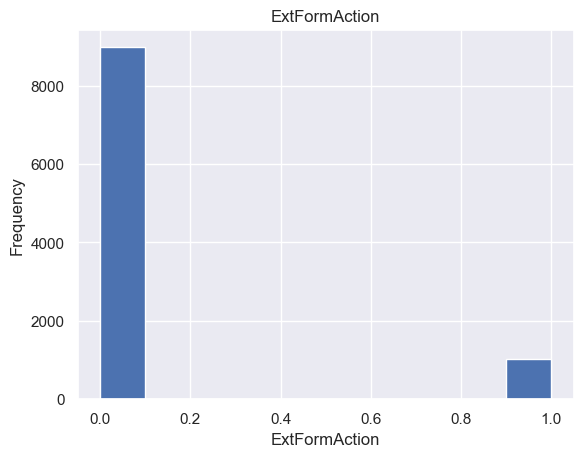

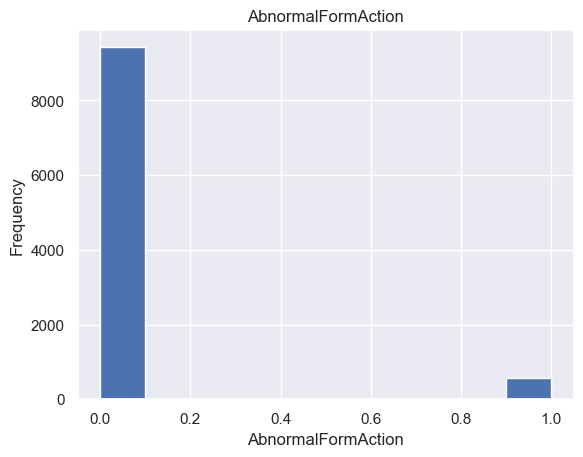

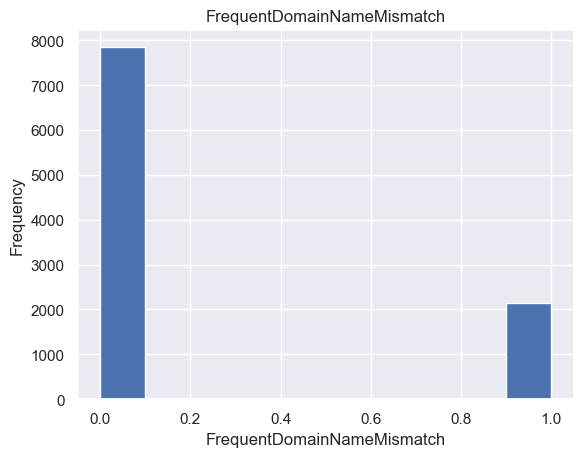

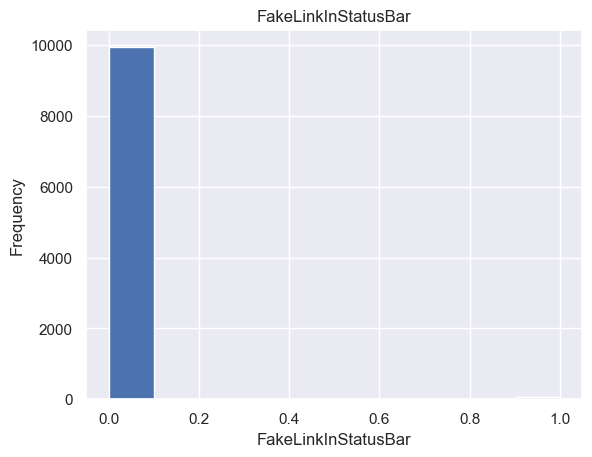

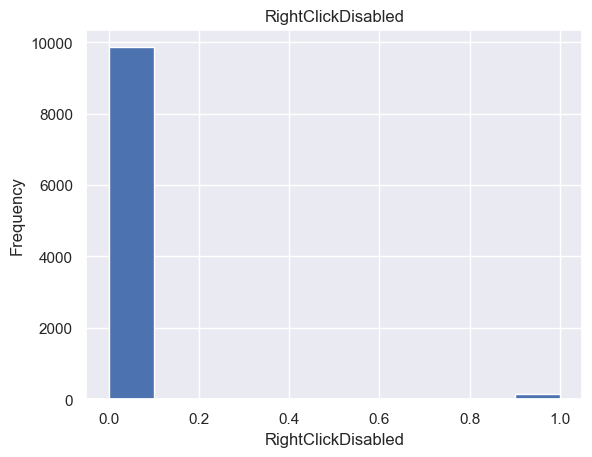

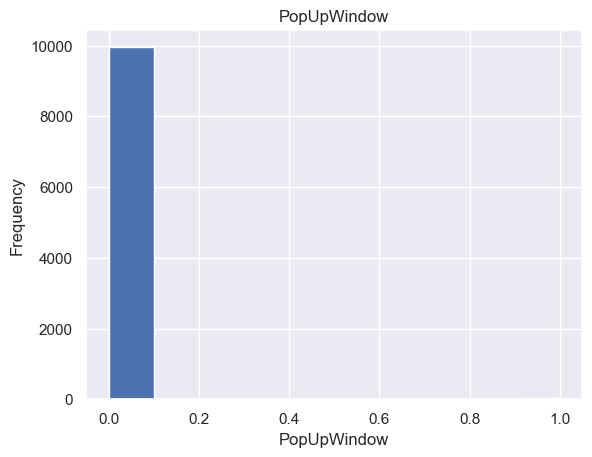

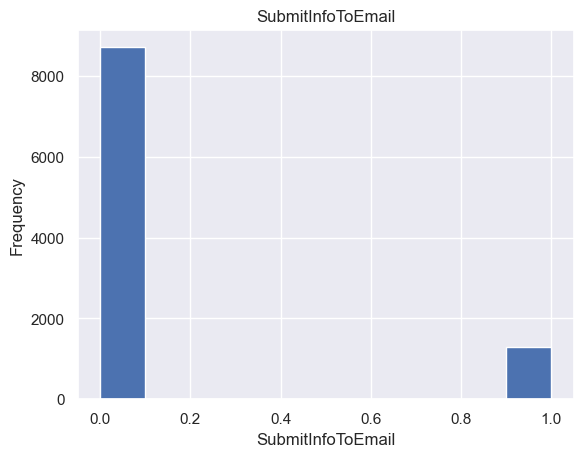

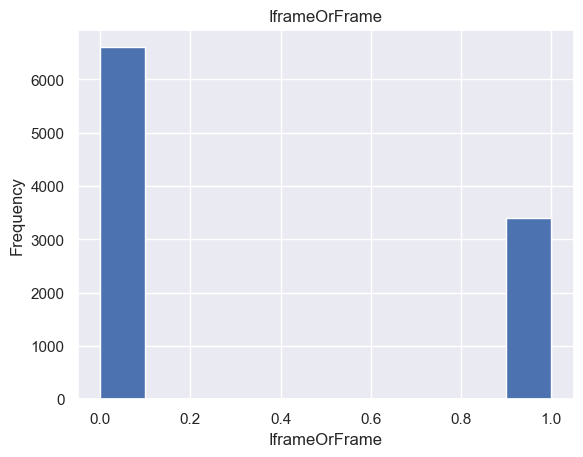

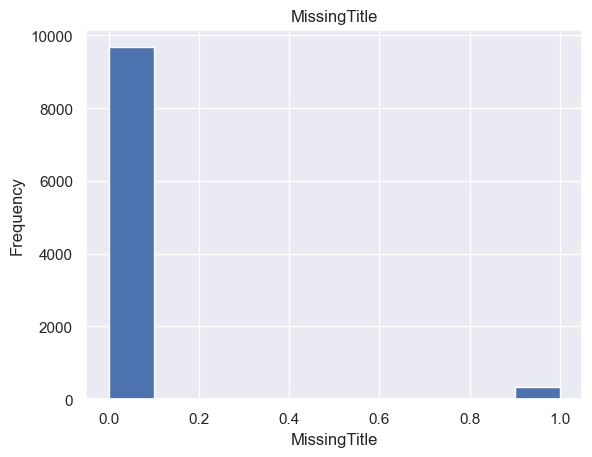

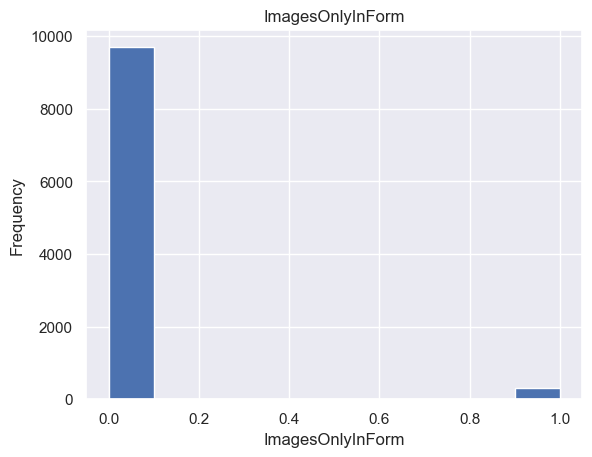

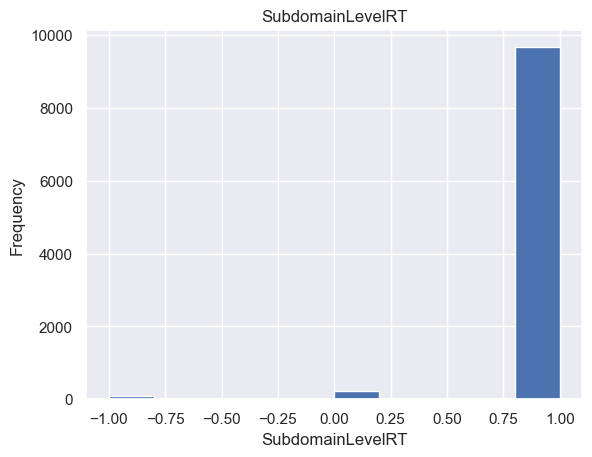

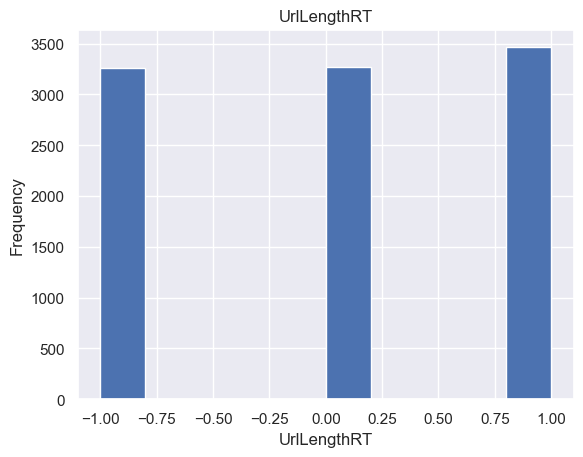

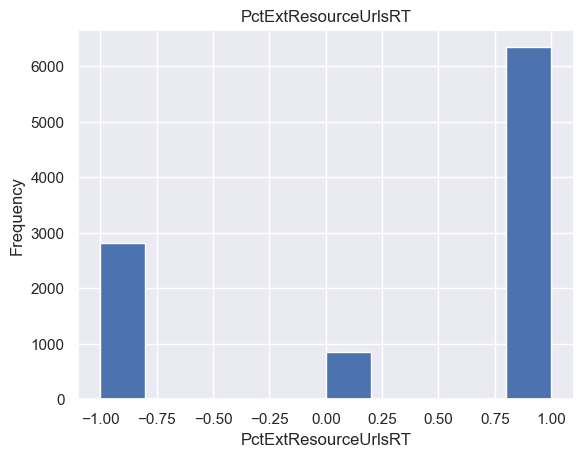

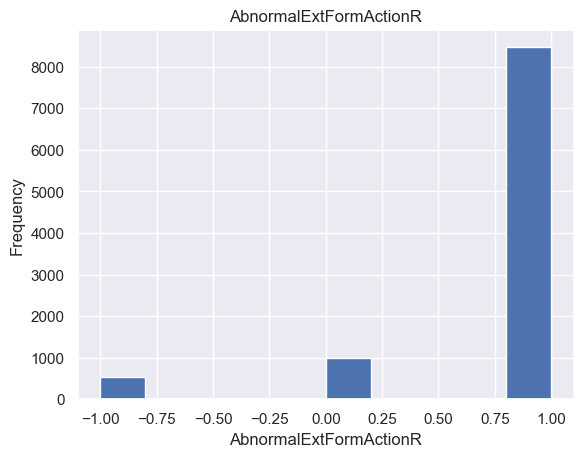

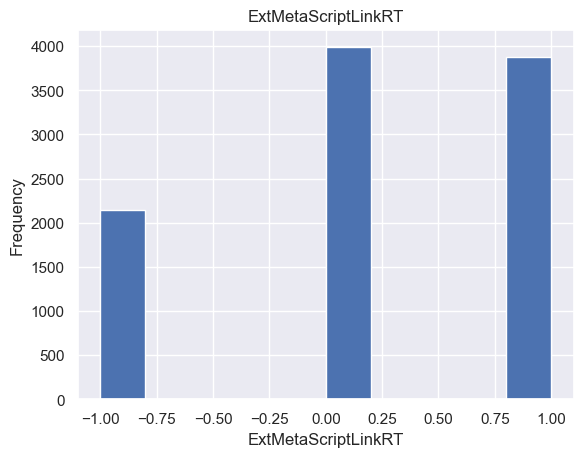

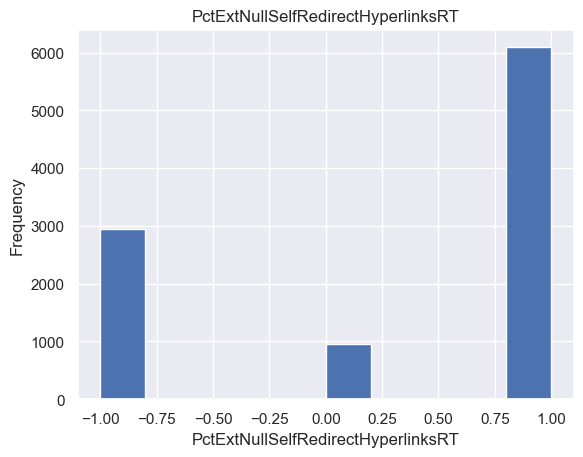

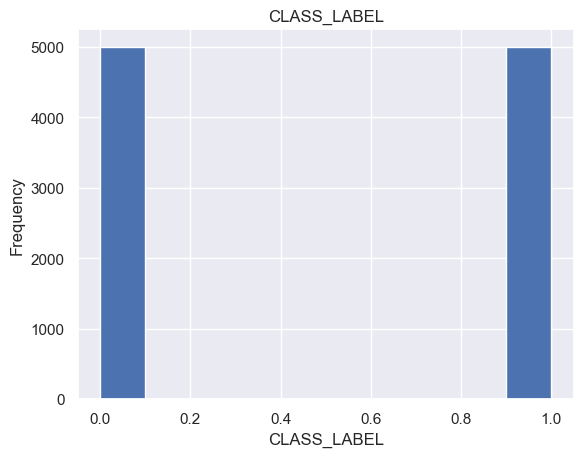

In [29]:
sns.set_theme(font_scale=1)
for col in ordinal_columns:
    plt.hist(dataset[col],bins=10)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'{col}')
    plt.show()

In [52]:
from scipy.stats import norm
from scipy import stats

In [54]:
#Function to perform normal distribution
def normal(mean, std, color="black"):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = stats.norm.pdf(x, mean, std)
    z = plt.plot(x, p, color, linewidth=2)
    


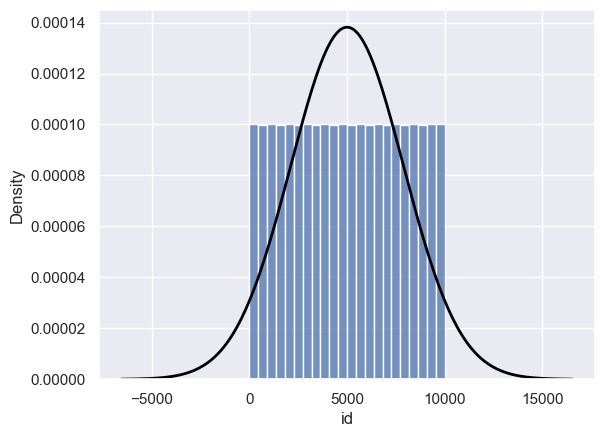

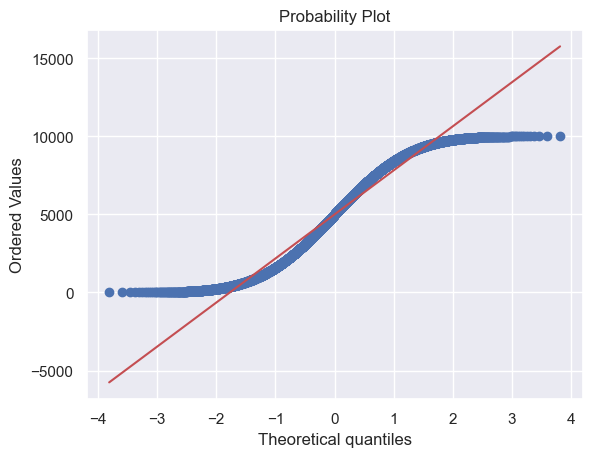

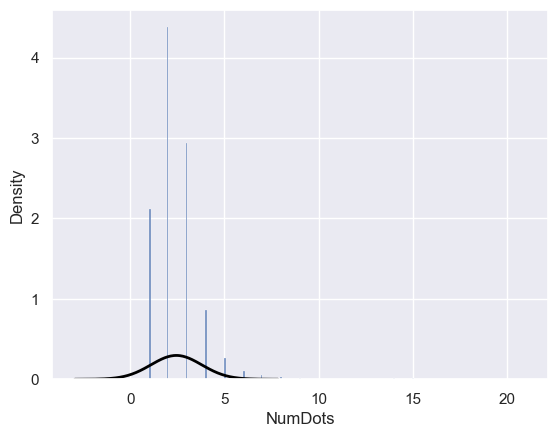

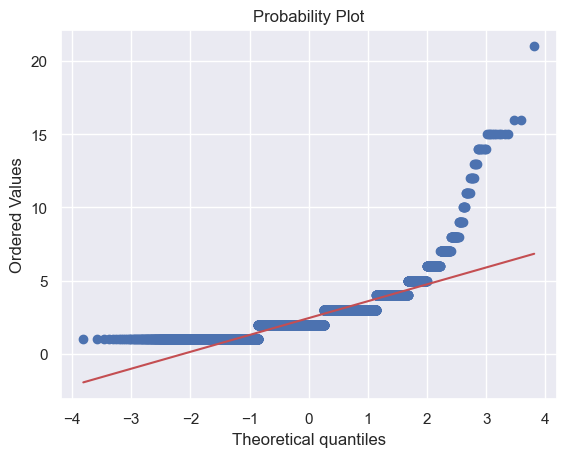

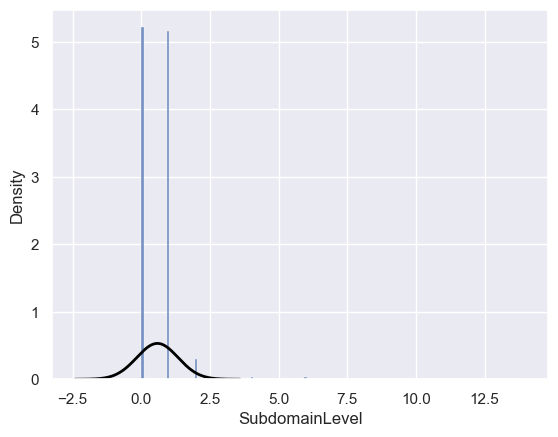

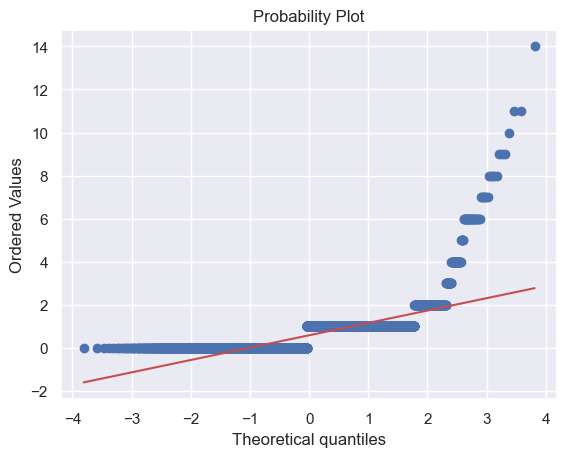

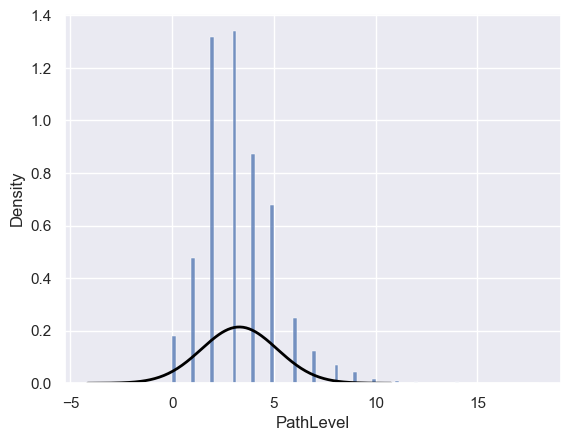

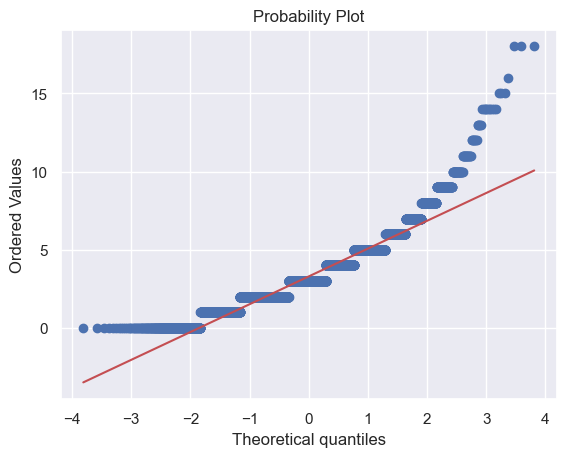

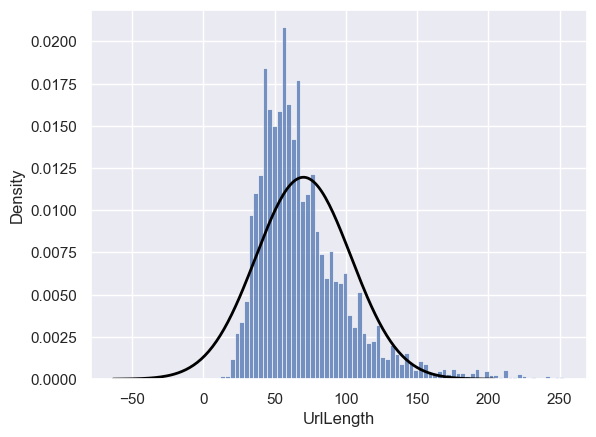

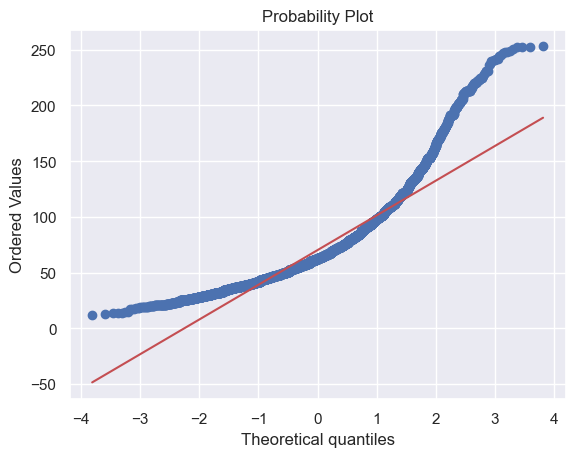

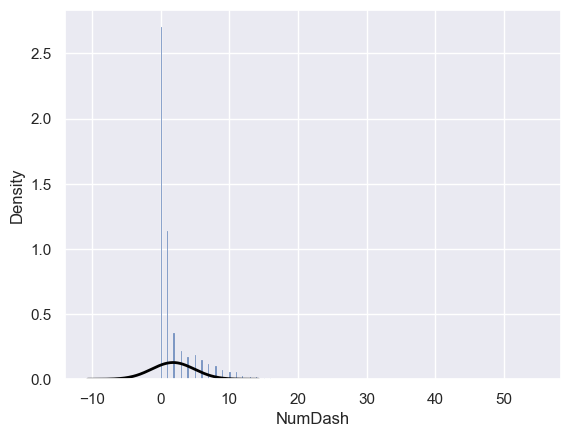

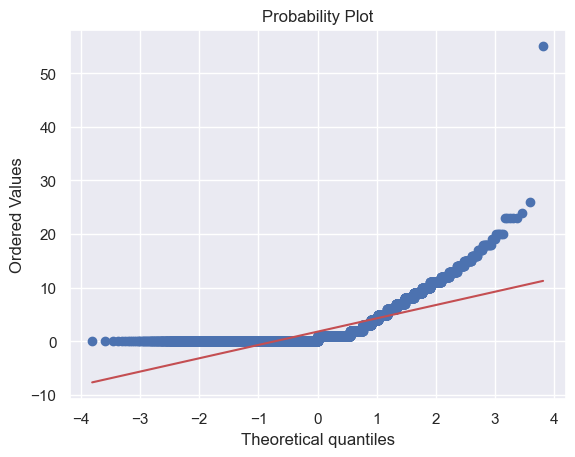

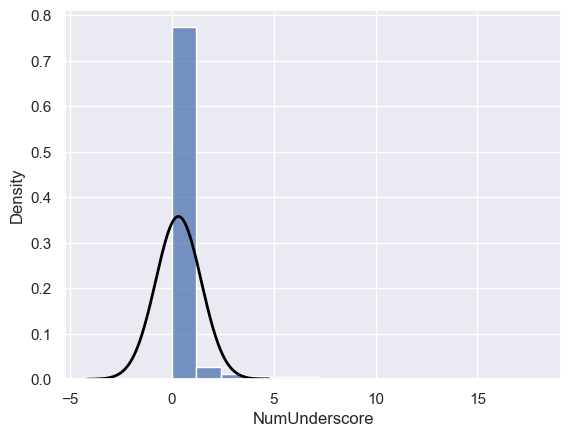

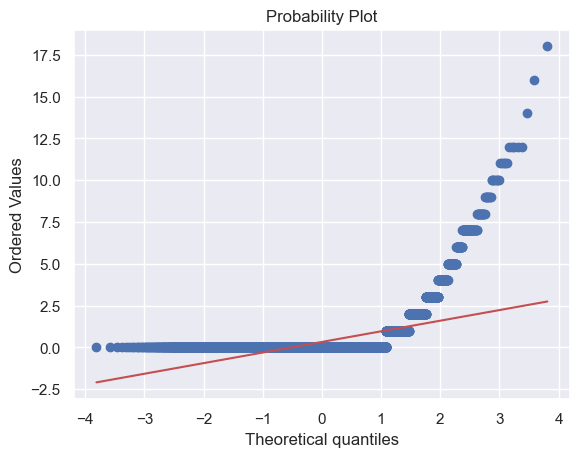

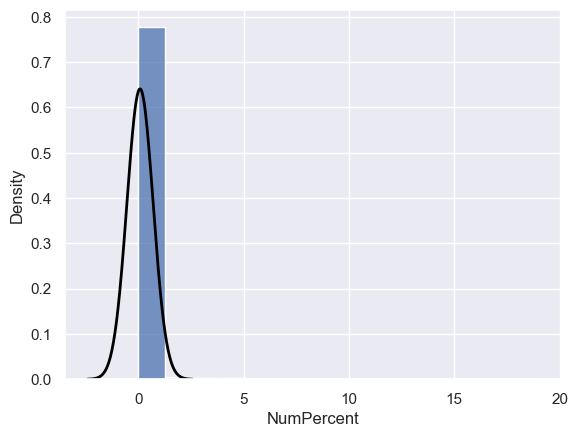

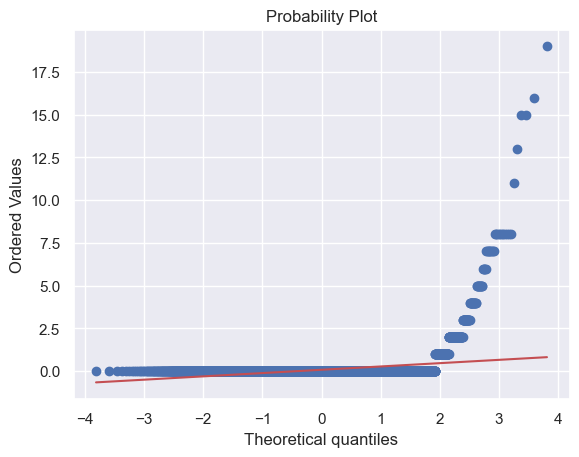

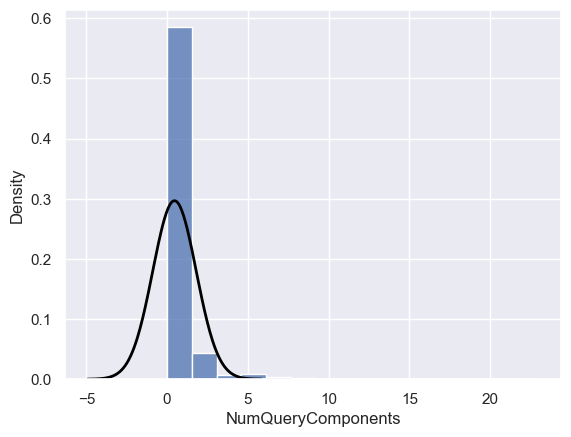

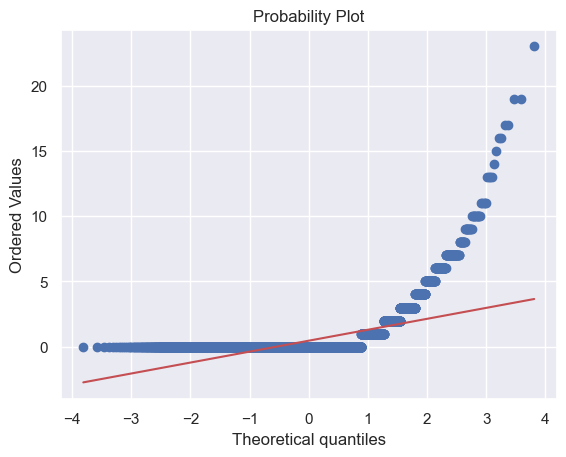

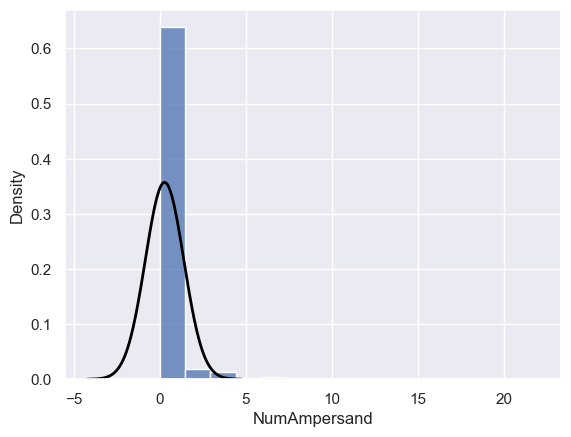

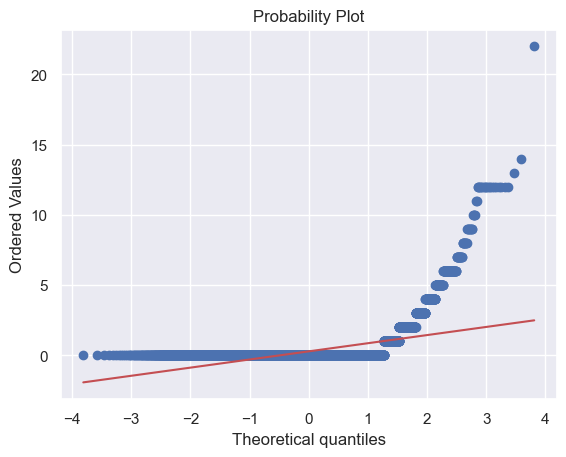

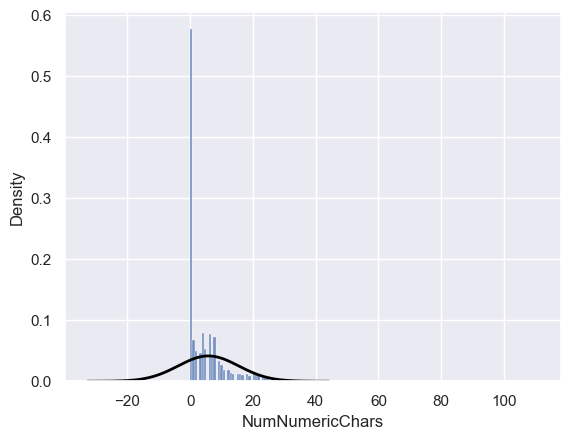

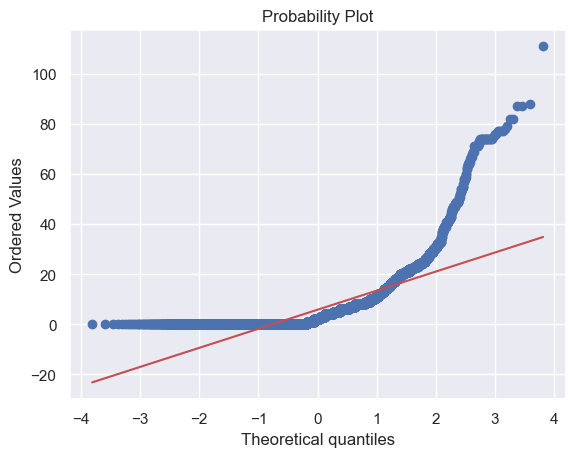

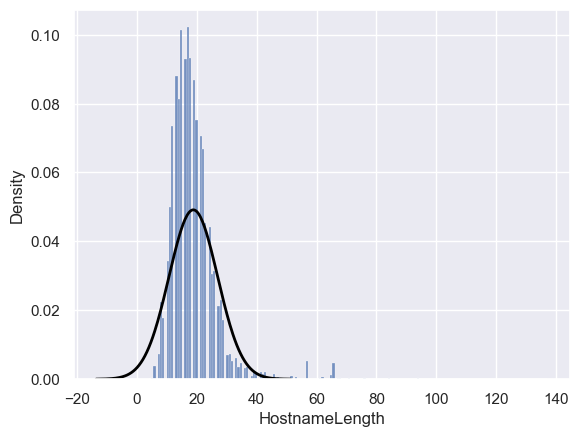

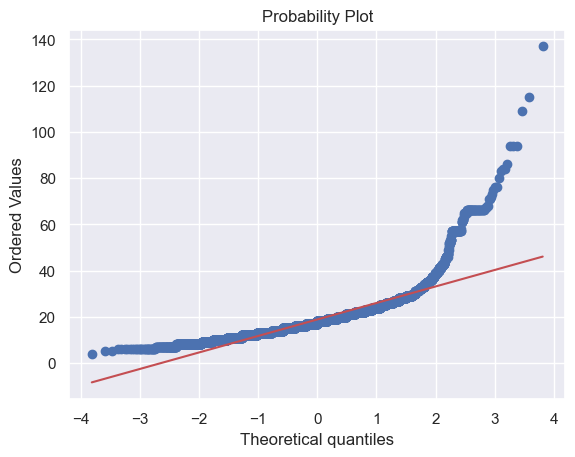

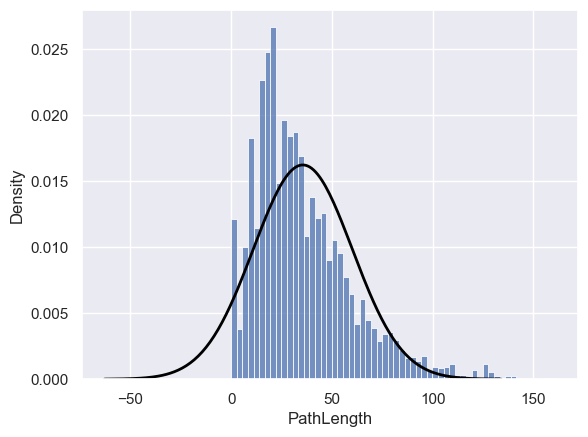

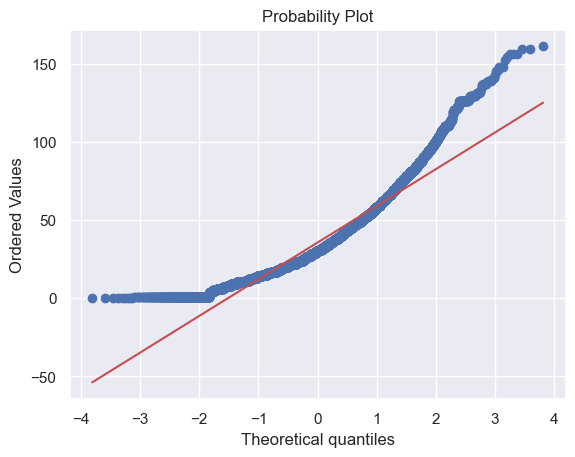

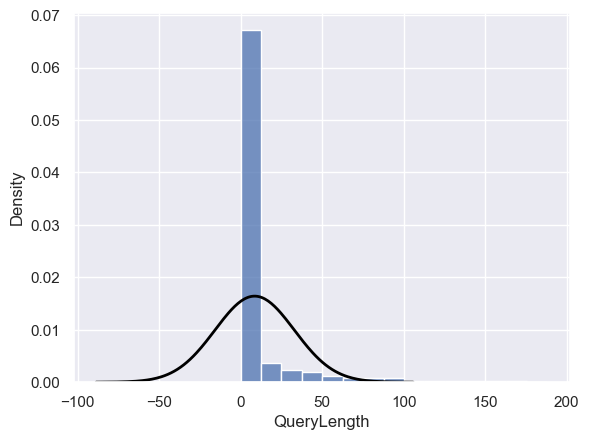

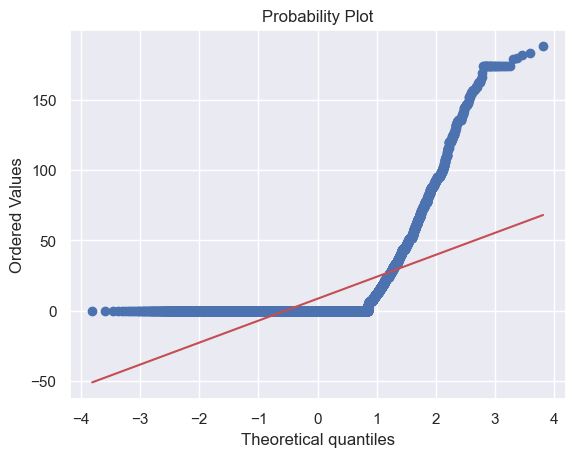

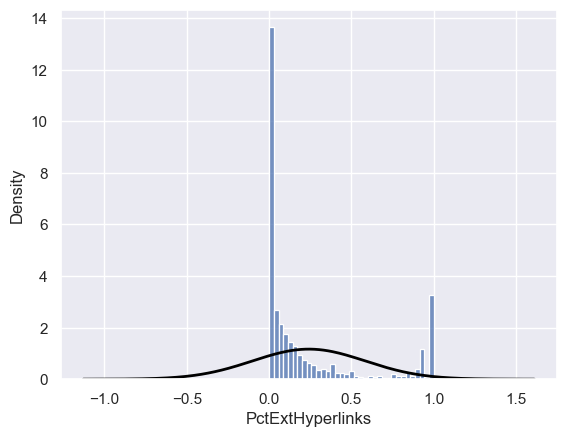

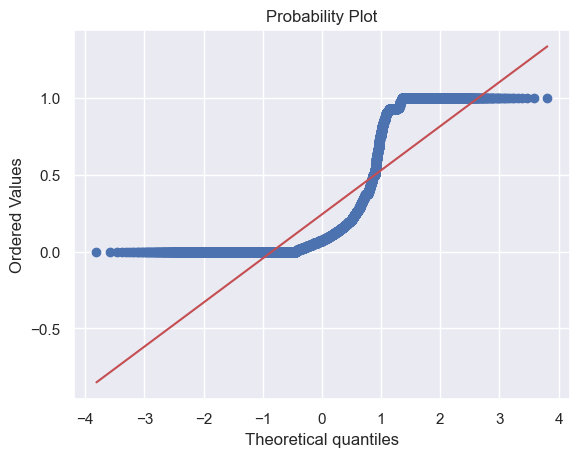

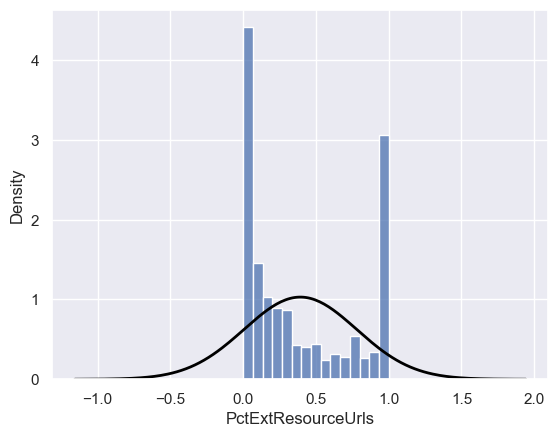

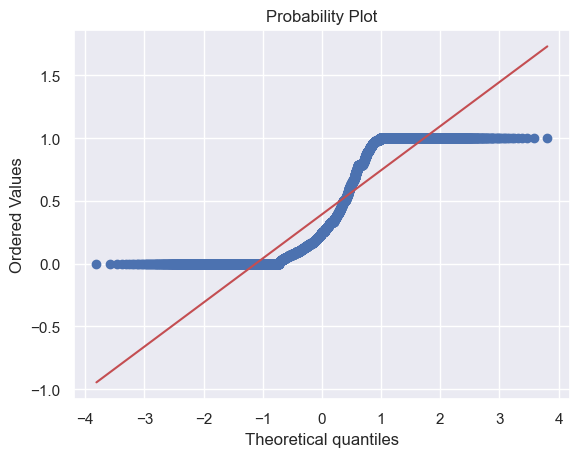

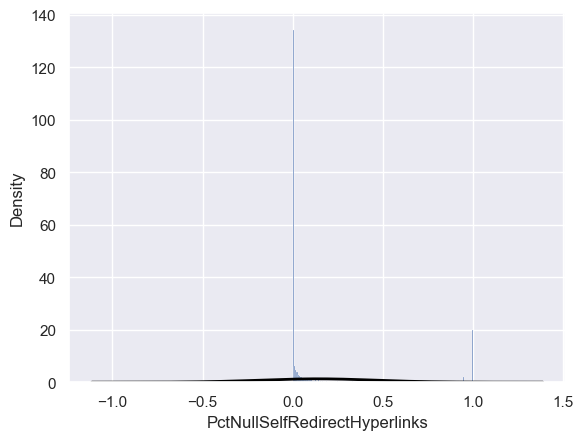

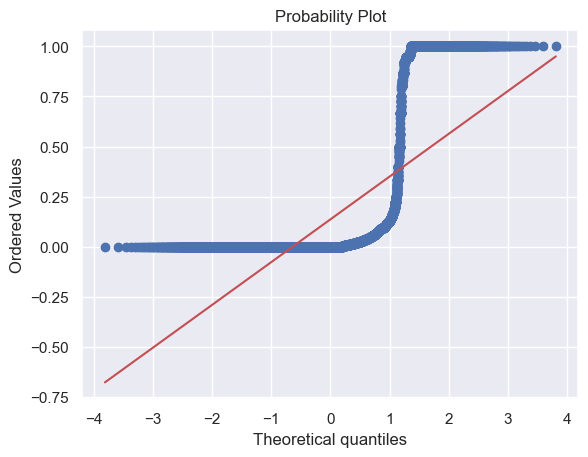

In [56]:
for col_name in continuous_columns:
    fig1, ax1 = plt.subplots()
    sns.histplot(x=dataset[col_name], stat='density', ax=ax1)
    normal(dataset[col_name].mean(), dataset[col_name].std())
    fig2, ax2 = plt.subplots()
    stats.probplot(dataset[col_name], plot=ax2)
    plt.show()

    


           
    

In [67]:
from scipy.stats import yeojohnson

In [69]:
for col in continuous_columns:
    dataset[col], _ = yeojohnson(dataset[col])


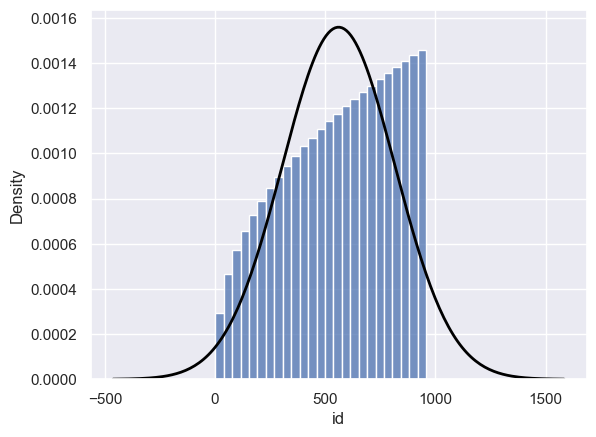

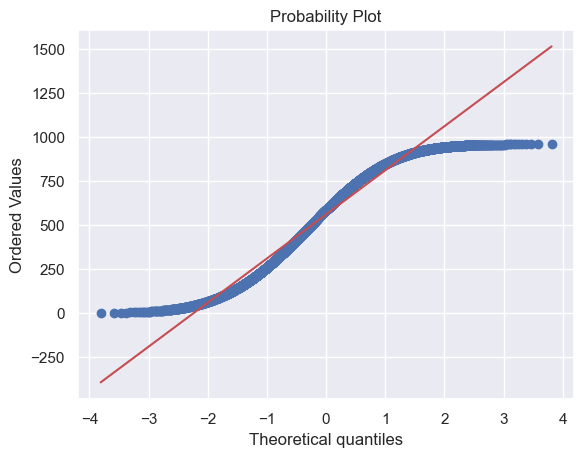

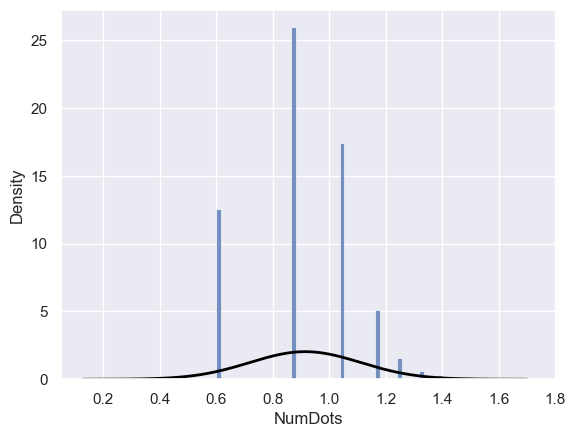

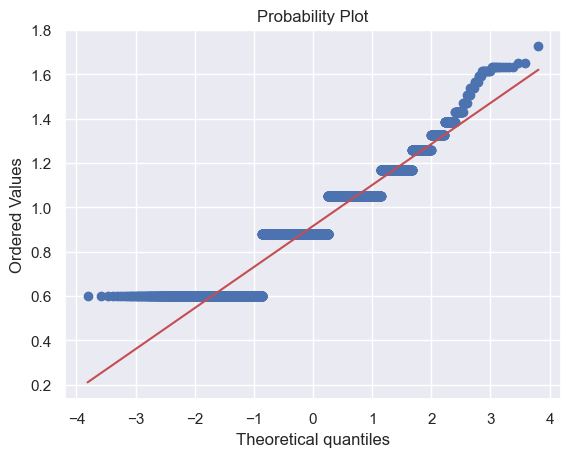

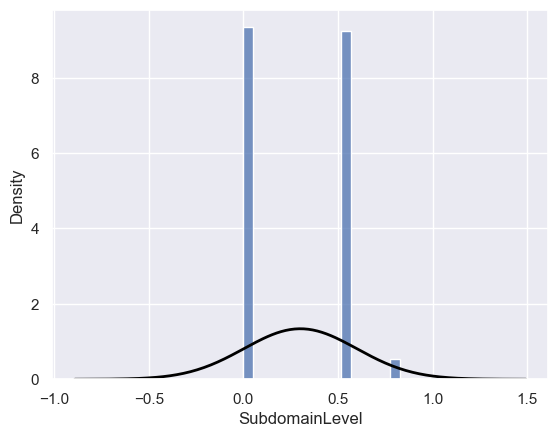

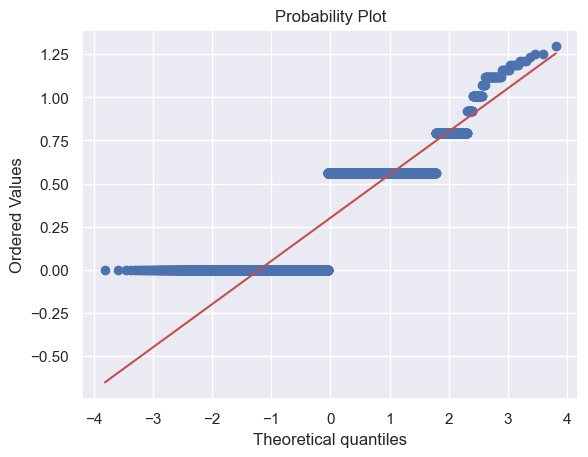

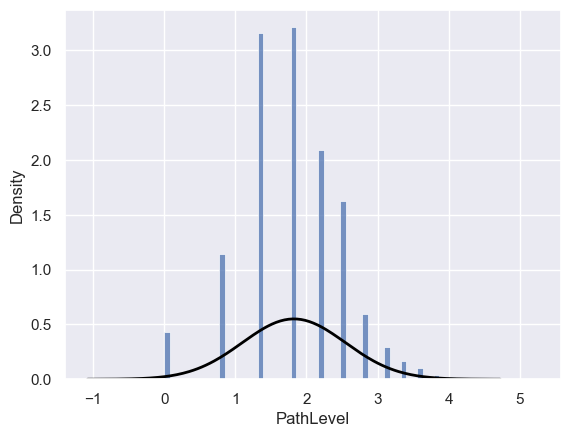

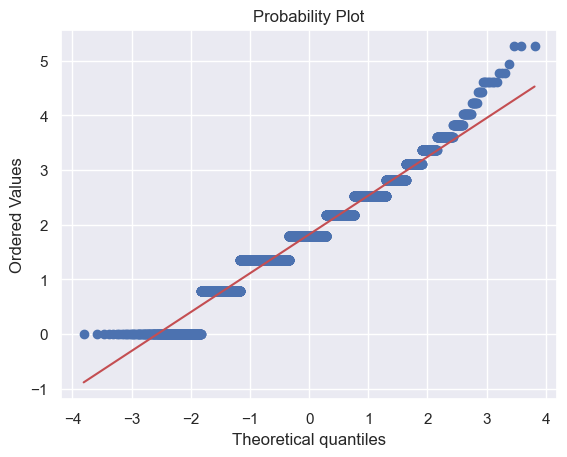

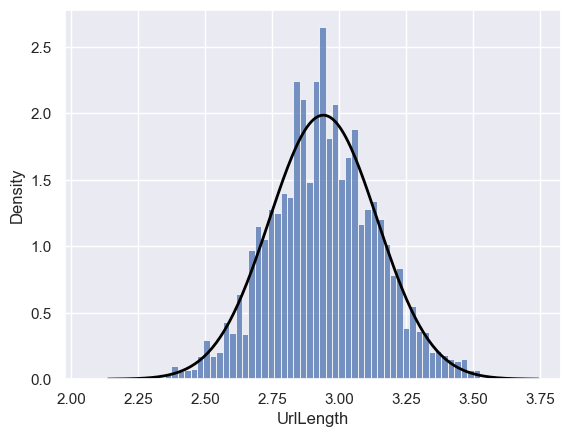

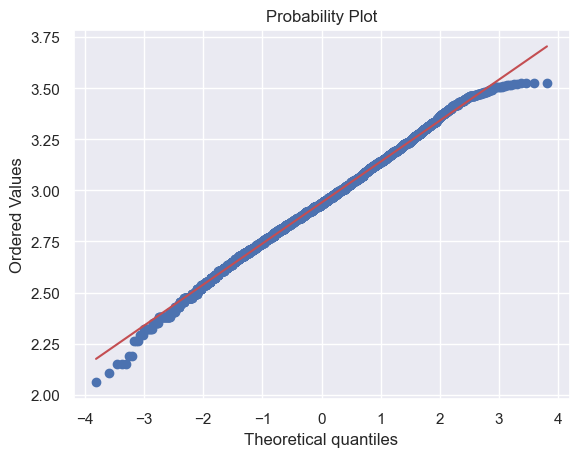

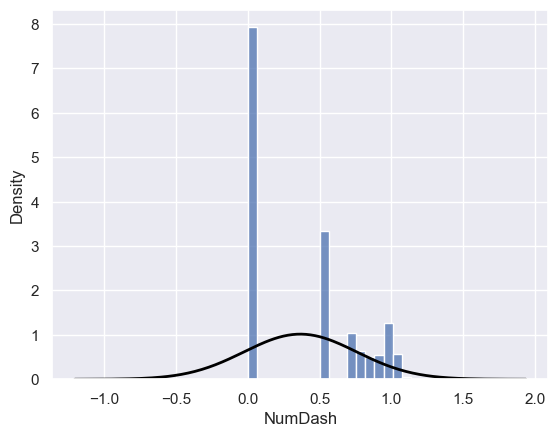

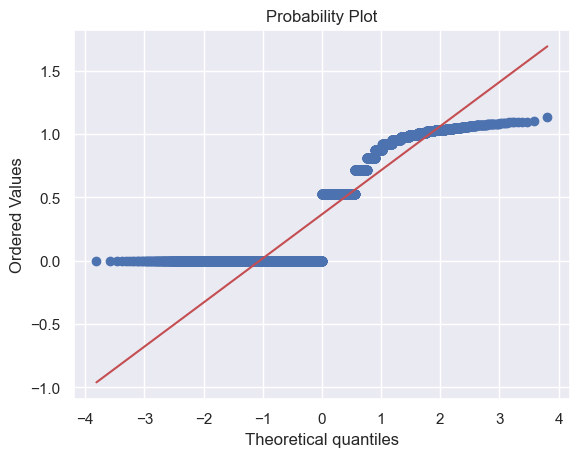

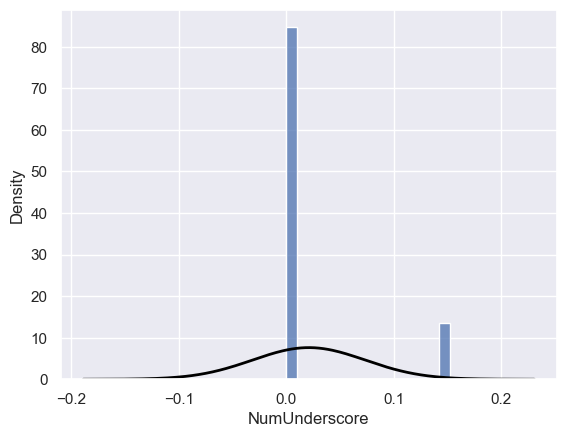

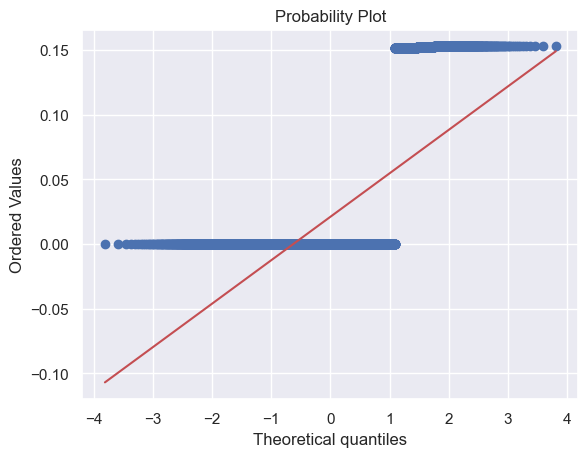

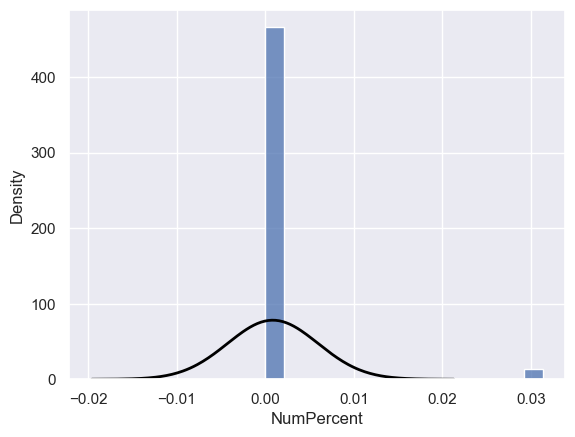

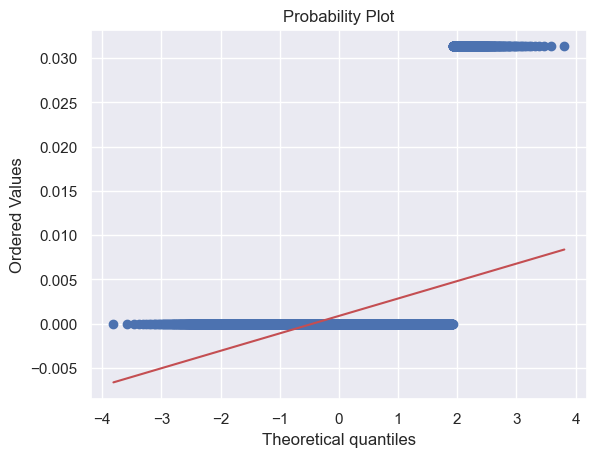

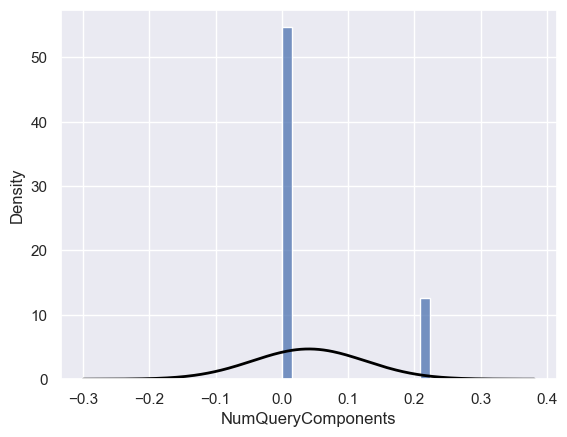

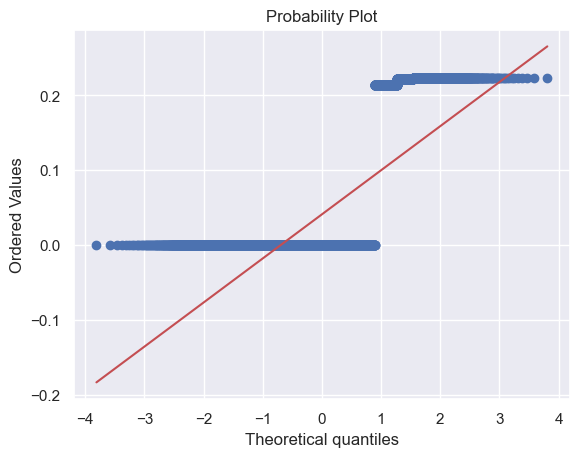

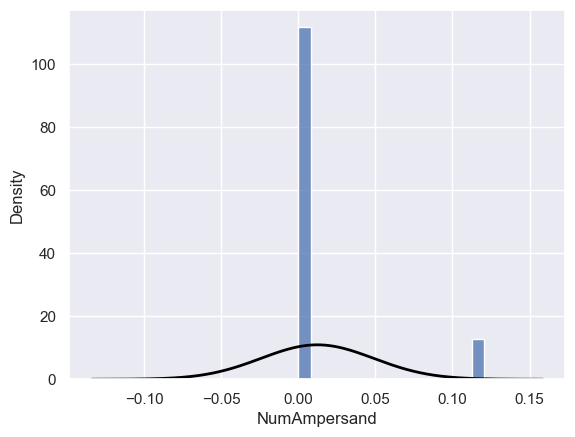

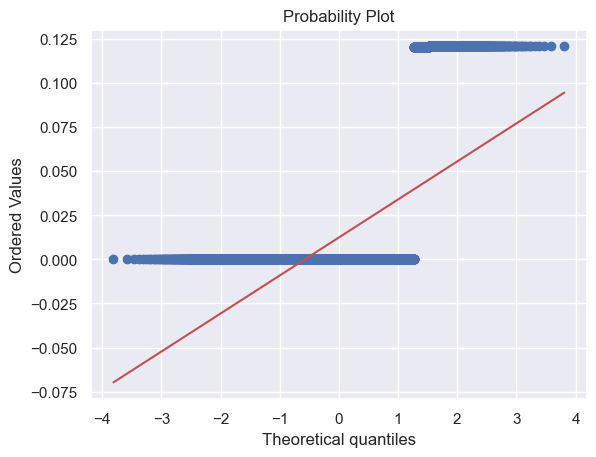

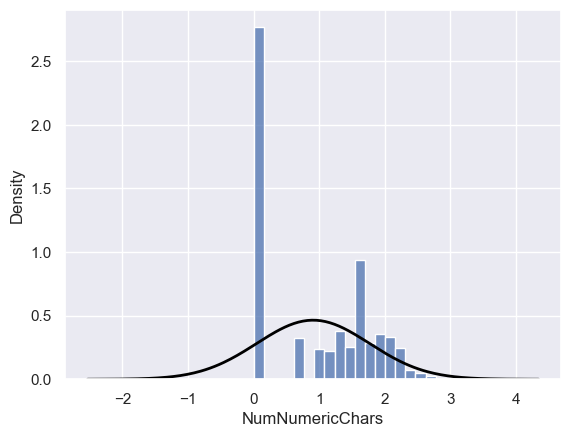

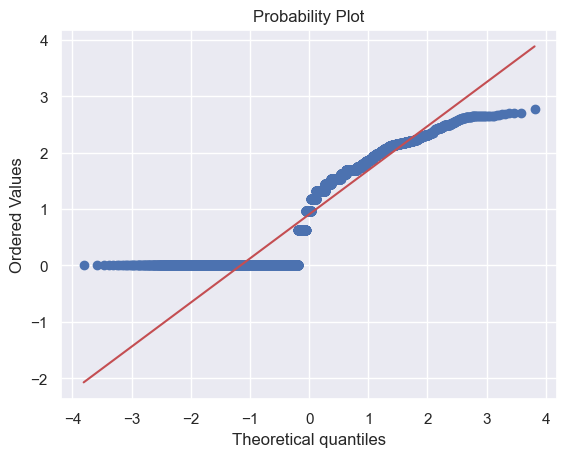

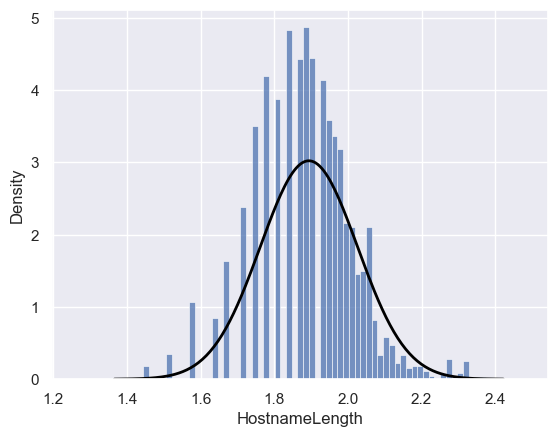

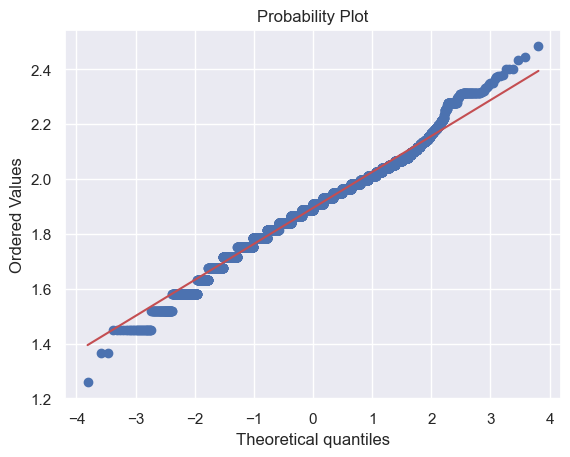

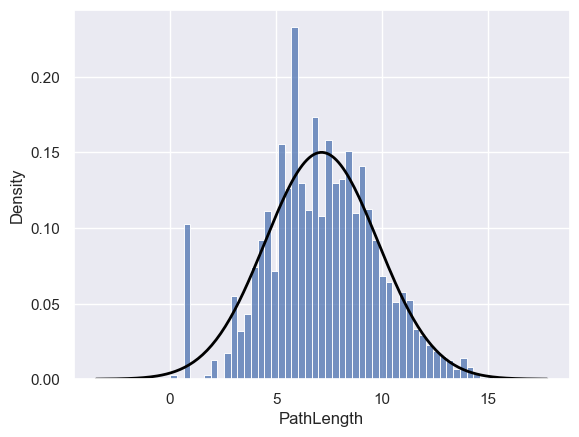

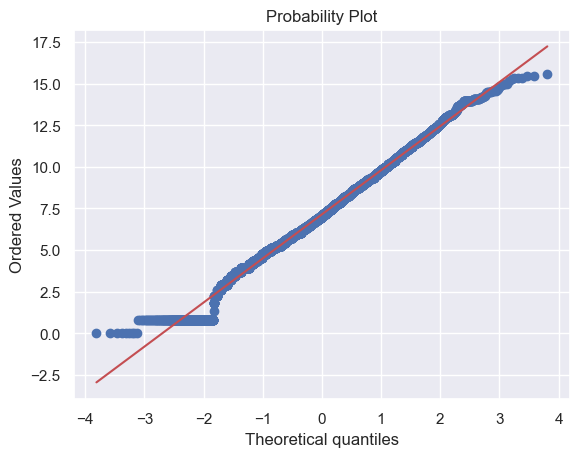

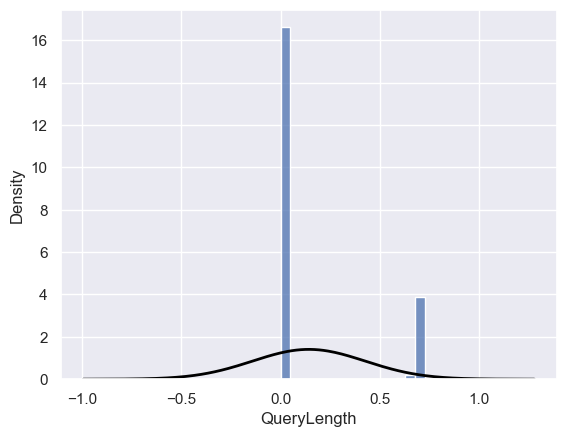

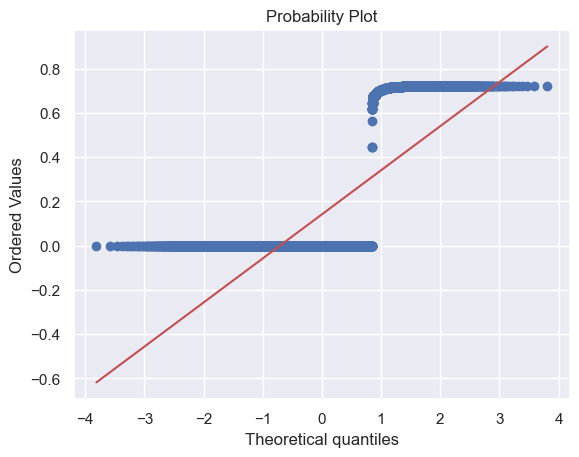

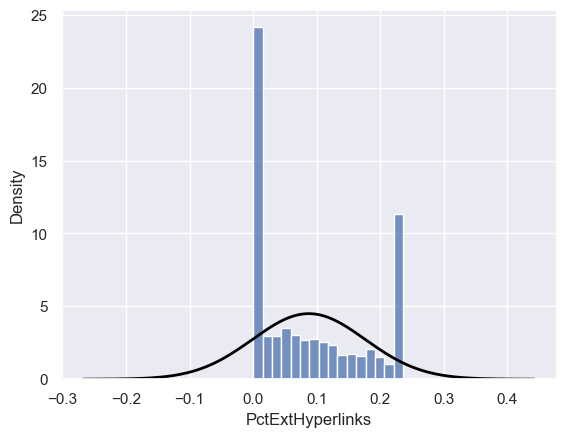

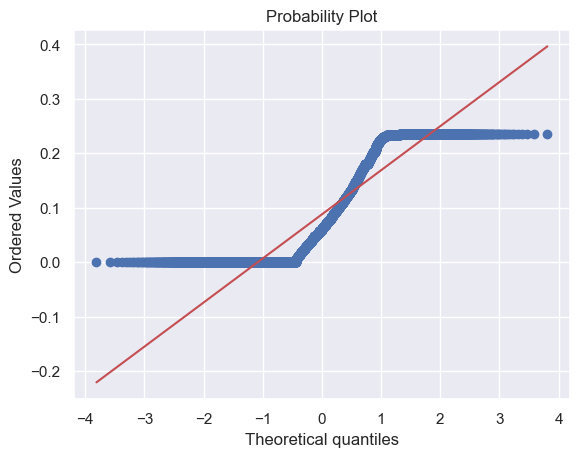

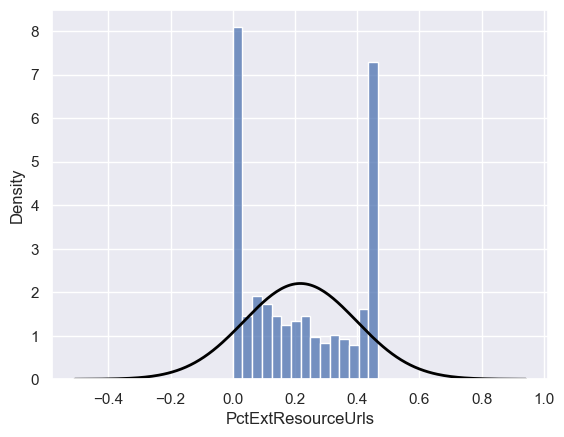

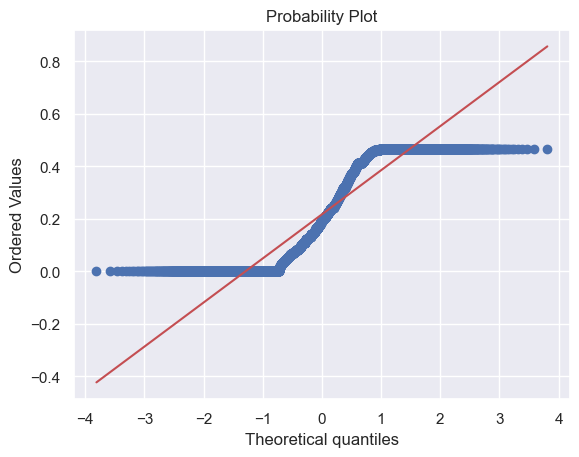

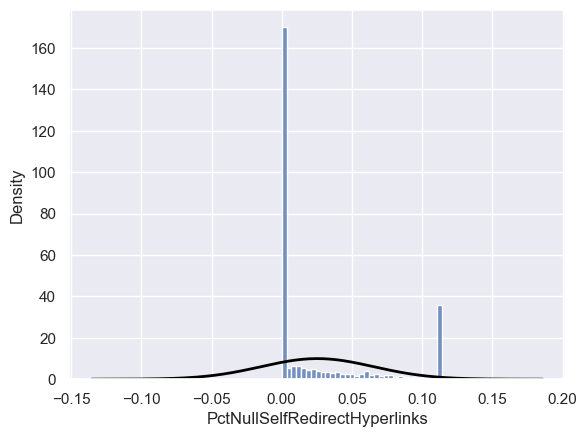

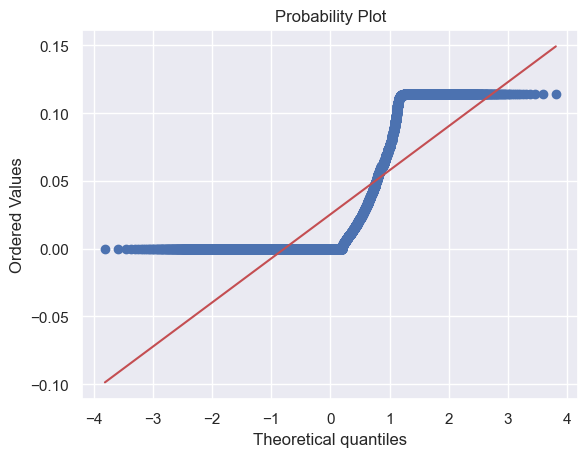

In [71]:
for col_name in continuous_columns:
    fig1, ax1 = plt.subplots()
    sns.histplot(x=dataset[col_name], stat='density', ax=ax1)
    normal(dataset[col_name].mean(), dataset[col_name].std())
    fig2, ax2 = plt.subplots()
    stats.probplot(dataset[col_name], plot=ax2)
    plt.show()
    
    
    
    
    



In [73]:
dataset = dataset[dataset['NumDots'] < 20] 
dataset = dataset[dataset['NumDash'] < 40]

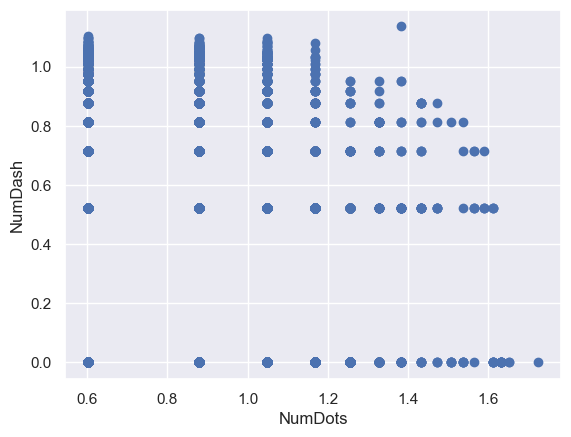

In [75]:
plt.scatter(x=dataset['NumDots'], y=dataset['NumDash'])
plt.xlabel('NumDots')
plt.ylabel('NumDash')
plt.show()

In [77]:
for col in continuous_columns:
    dataset[col], _ = yeojohnson(dataset[col])


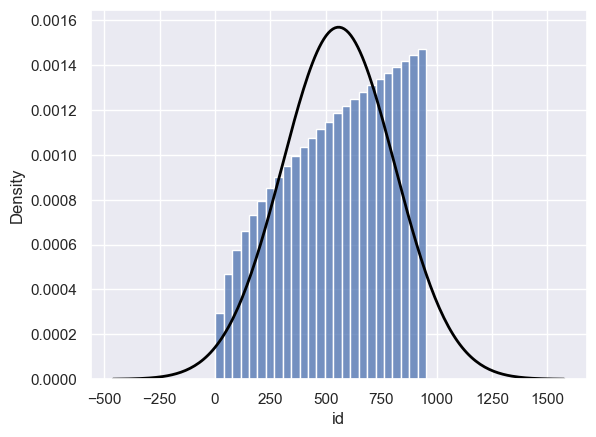

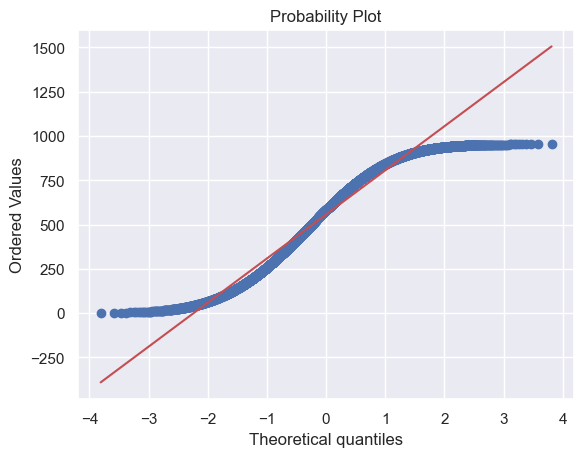

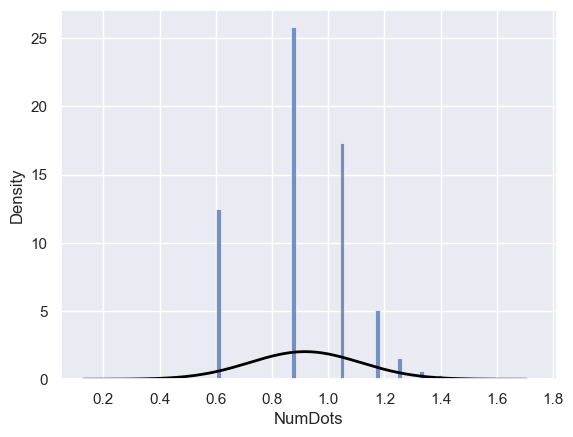

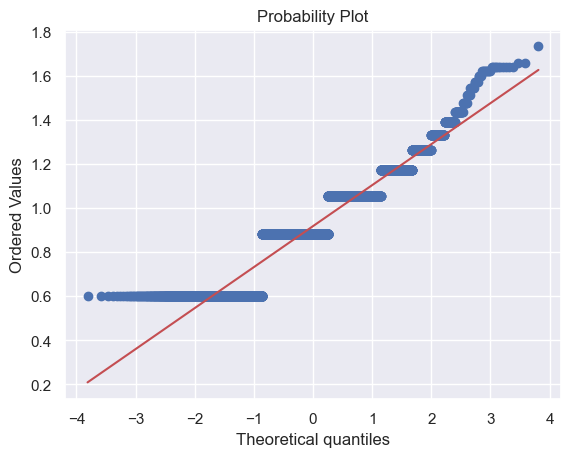

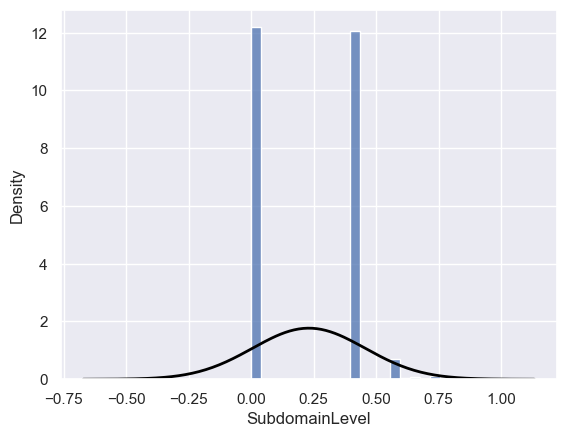

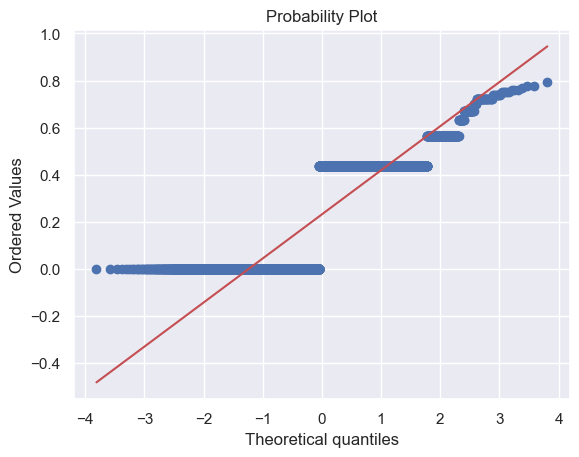

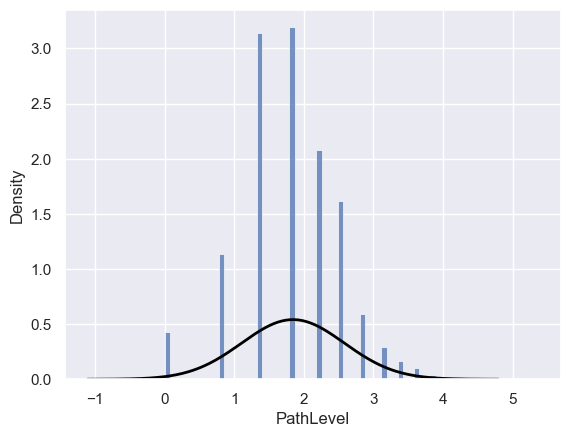

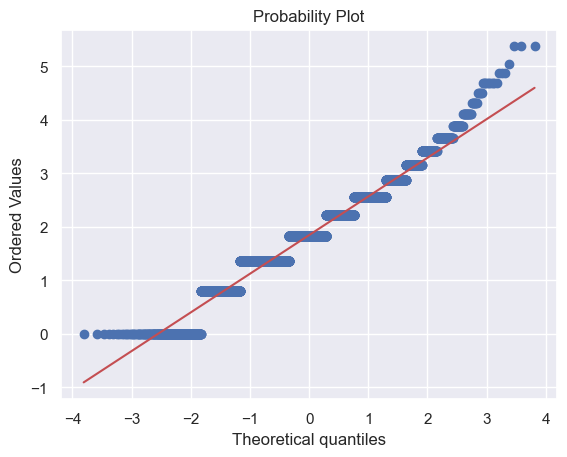

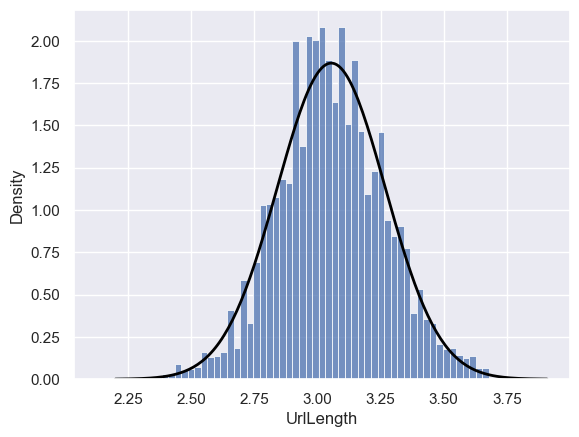

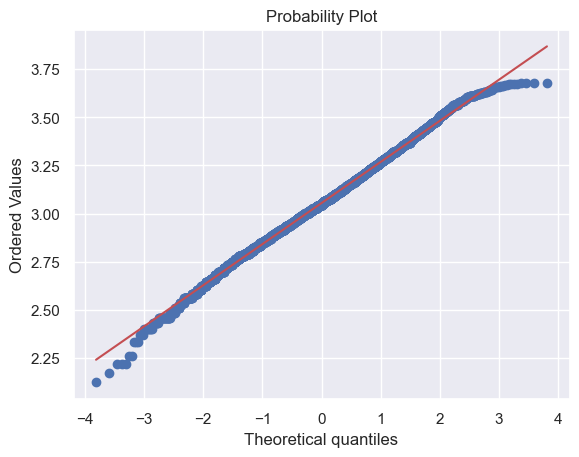

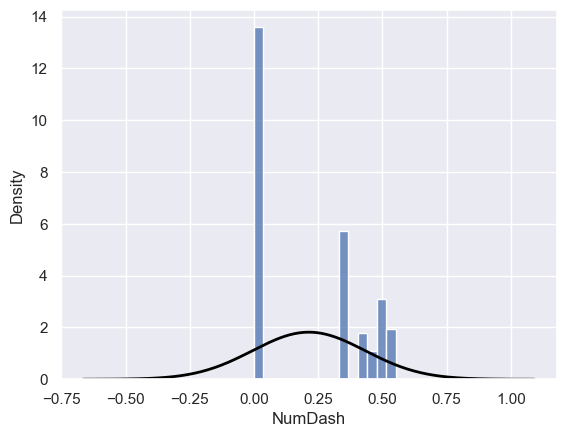

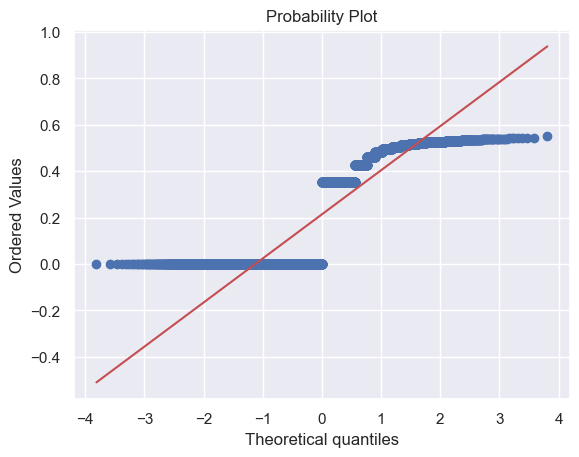

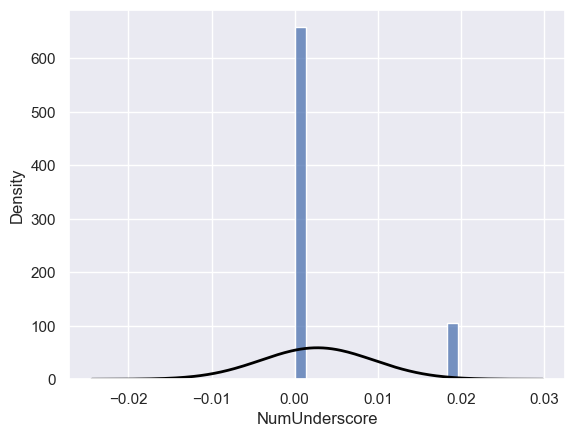

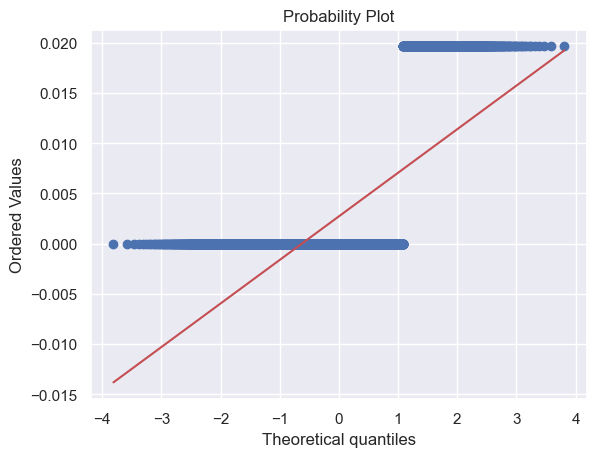

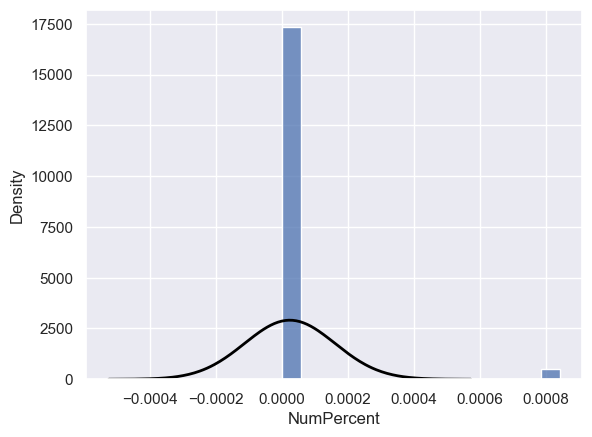

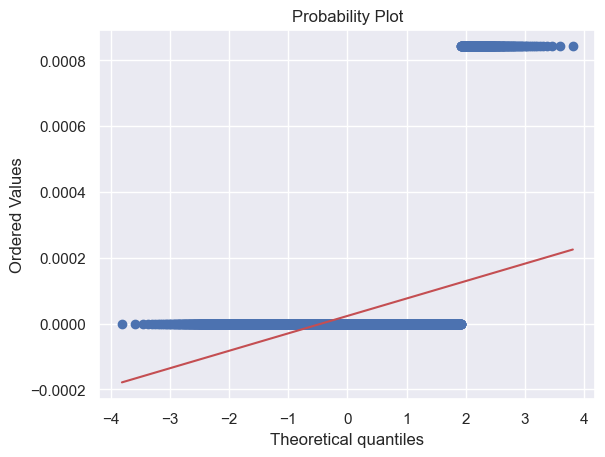

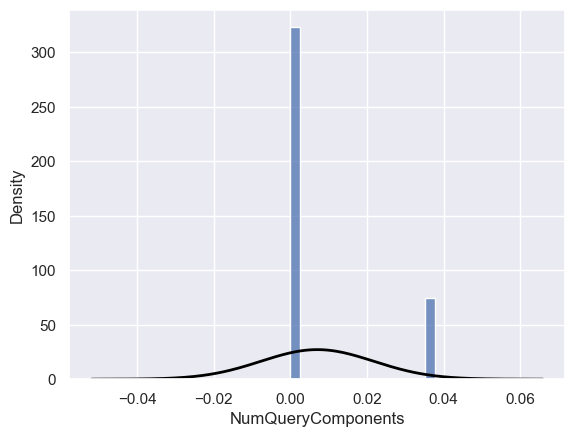

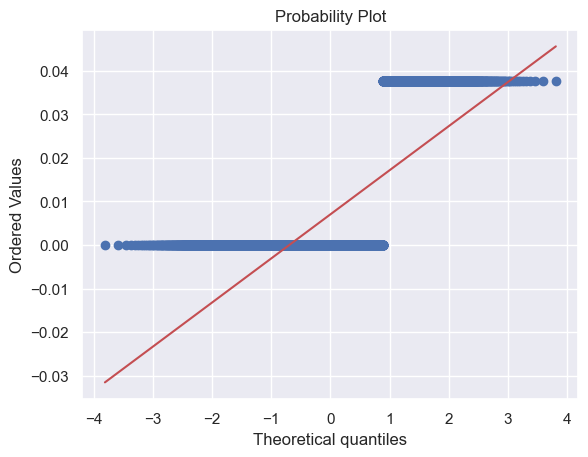

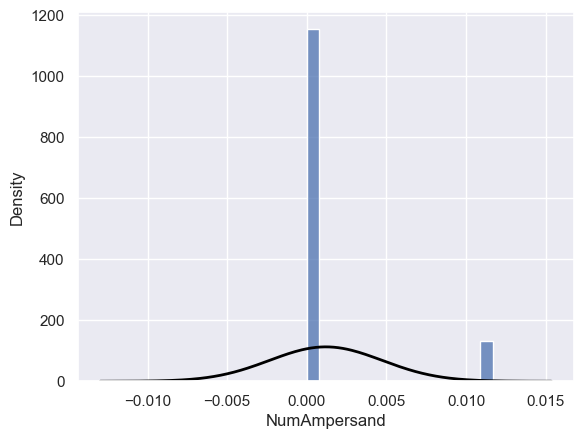

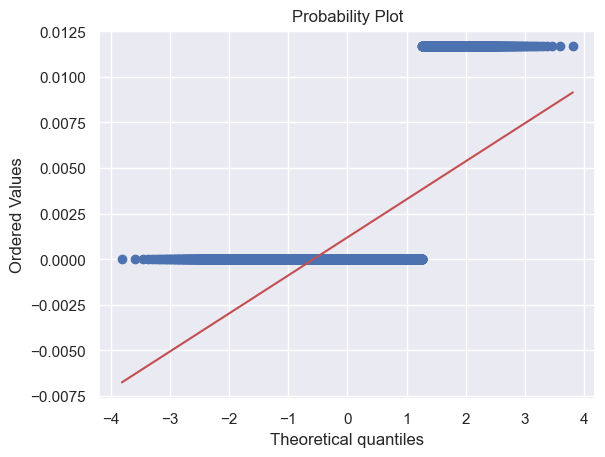

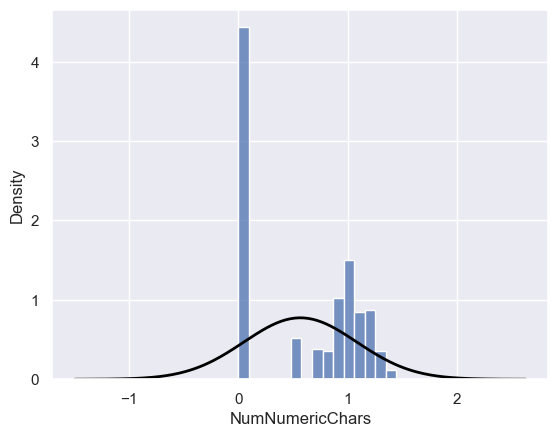

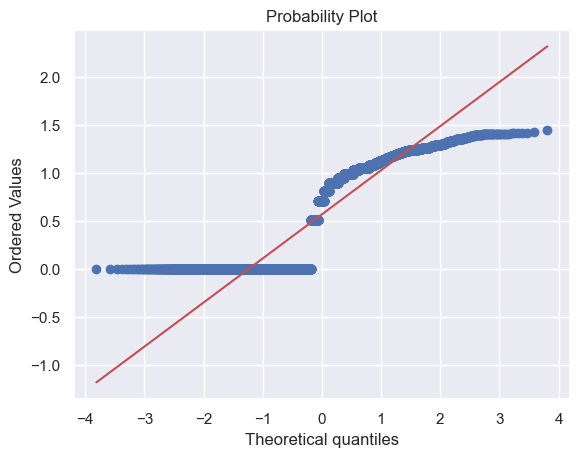

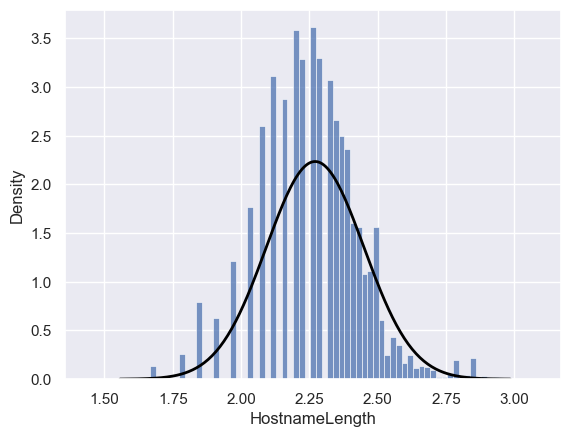

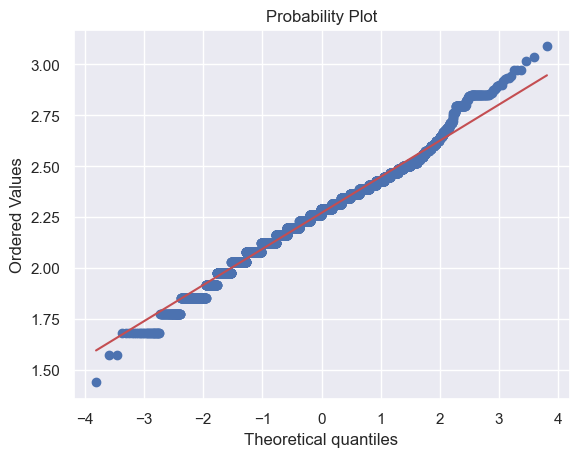

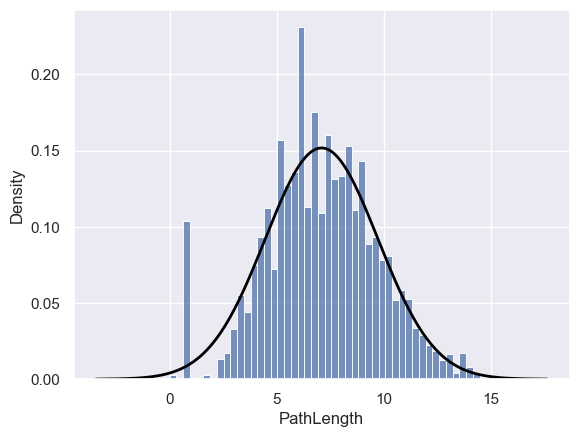

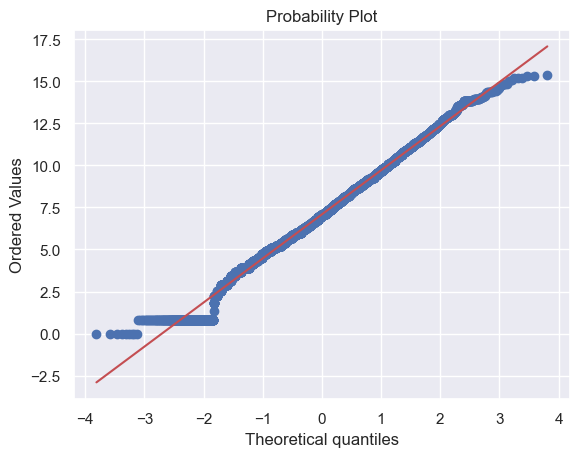

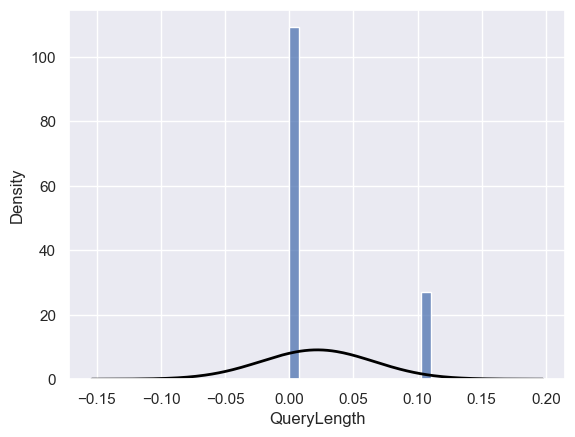

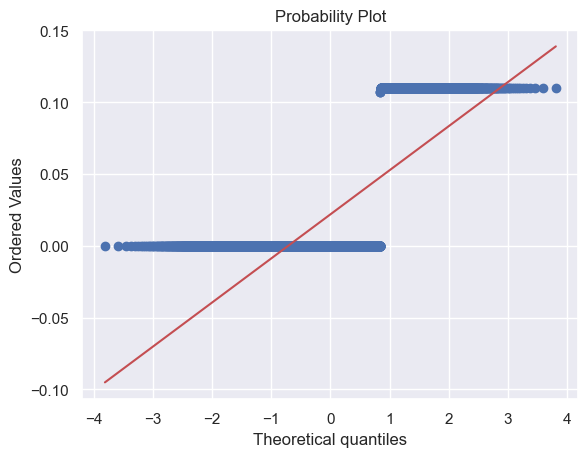

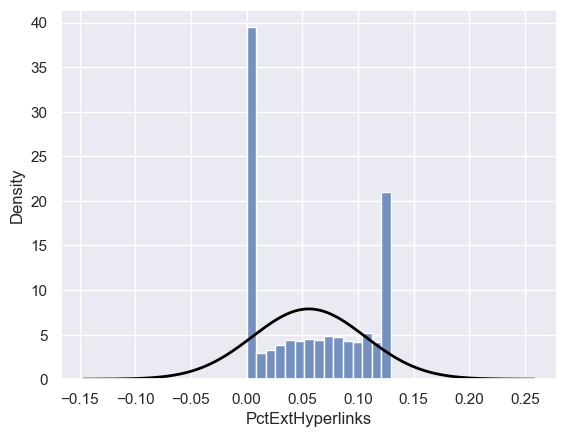

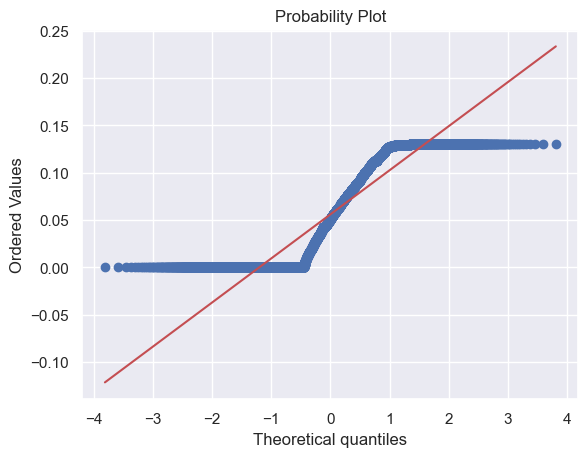

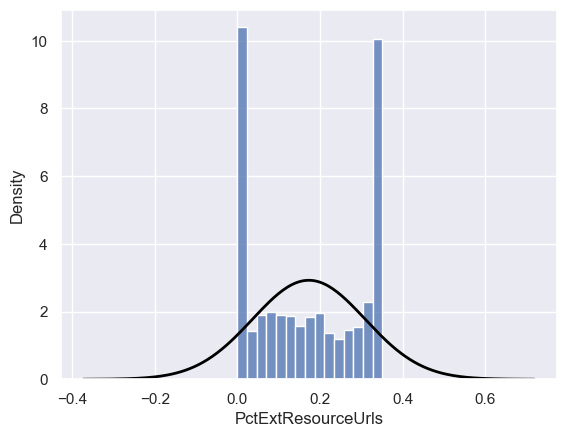

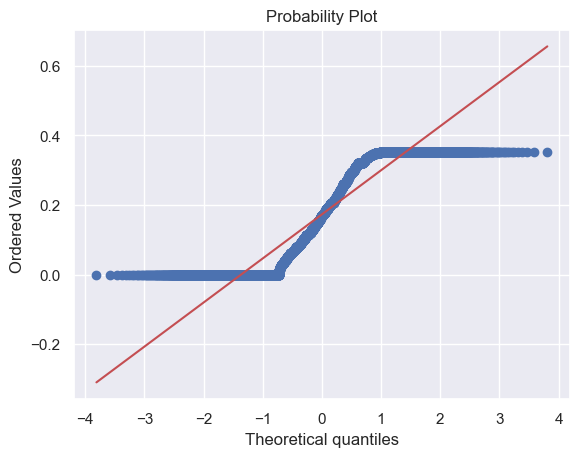

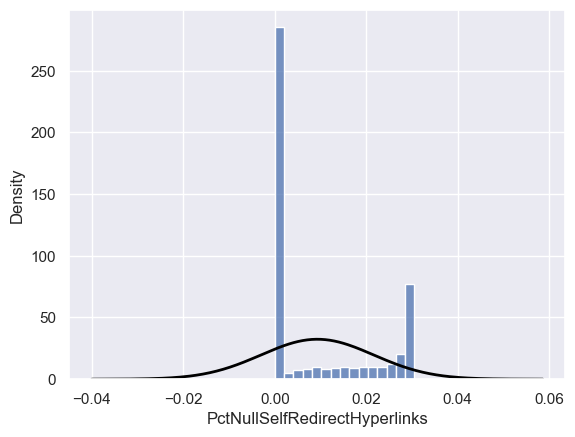

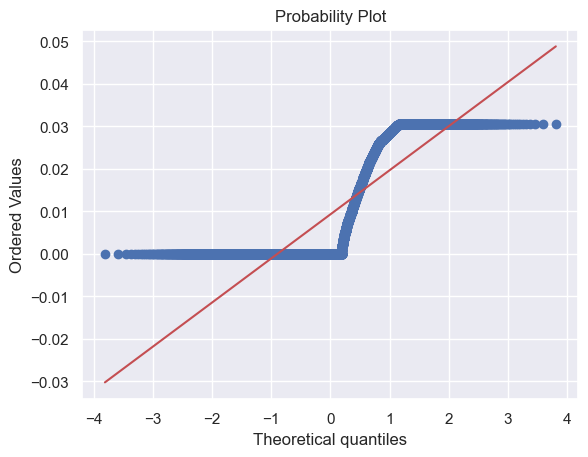

In [79]:
for col_name in continuous_columns:
    fig1, ax1 = plt.subplots()
    sns.histplot(x=dataset[col_name], stat='density', ax=ax1)
    normal(dataset[col_name].mean(), dataset[col_name].std())
    fig2, ax2 = plt.subplots()
    stats.probplot(dataset[col_name], plot=ax2)
    plt.show()

In [83]:
from sklearn.model_selection import train_test_split

In [115]:
#Training phase of the data
cols = dataset.columns.to_list()
cols.remove('CLASS_LABEL')
X = dataset[cols]
y = dataset['CLASS_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
pip install optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/15/da/68883911855d8b4d521f9a370e4e6aab8232b91c1d8d5a8348c4680c6642/optuna-3.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/df/ed/c884465c33c25451e4a5cd4acad154c29e5341e3214e220e7f3478aa4b0d/alembic-1.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/f3/18/3e867ab37a24fdf073c1617b9c7830e06ec270b1ea4694a624038fc40a03/colorlog-6.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/03/62/70f5a0c2dd208f9f3f2f9afd103aec42ee4d9ad2401d78342f75e9b8da36/Mako-1.3.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/380.1 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/380.1 kB 960.0 kB/s eta 0:00:01
   ---- ---------------------------------- 41.0/380

In [152]:
import optuna
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [172]:
def objective(trial):
     n_estimators = trial.suggest_int('n_estimators', 10, 300)
     max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
     min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
     clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1)
     clf.fit(X_train, y_train)
     y_pred = clf.predict(X_test)
     accuracy = accuracy_score(y_test, y_pred)
     return accuracy
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_trial = study.best_trial
results = best_trial.params

        

[I 2024-06-29 01:48:57,400] A new study created in memory with name: no-name-84d5fcd7-f2be-4da3-a665-a4f6aa6dd0b5
[I 2024-06-29 01:48:58,134] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 139, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 14}. Best is trial 0 with value: 1.0.
[I 2024-06-29 01:48:58,902] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 297, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 18}. Best is trial 0 with value: 1.0.
[I 2024-06-29 01:48:59,496] Trial 2 finished with value: 0.9995 and parameters: {'n_estimators': 291, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 1.0.
[I 2024-06-29 01:49:00,063] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 240, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 15}. Best is trial 0 with value: 1.0.
[I 2024-06-29 01:49:00,709] Trial 4 finished with value: 1.0 and parameters: {'n_estimators'

In [174]:
model = RandomForestClassifier(n_estimators=results['n_estimators'], max_depth=results['max_depth'], min_samples_split=results['min_samples_split'], min_samples_leaf=results['min_samples_leaf'], random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=14, min_samples_split=10,
                       n_estimators=139, n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import 

In [176]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined